### Upload data 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving biodeg.csv to biodeg.csv


### Import library

In [ ]:
import collections
import sys
import os
import io
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Image
%matplotlib inline

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
import random
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['biodeg.csv']), sep=';')
df_name = df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

Analyse Data


*   There is no null value in data set
*   There is no time-related data
*   The experimental_class, or target variable is type object


### Data quality and missing value assessment

In [ ]:
plt.rc('font', size=14)
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

In [ ]:
df.isnull().sum()

SpMax_L               0
J_Dz(e)               0
nHM                   0
F01[N-N]              0
F04[C-N]              0
NssssC                0
nCb-                  0
C%                    0
nCp                   0
nO                    0
F03[C-N]              0
SdssC                 0
HyWi_B(m)             0
LOC                   0
SM6_L                 0
F03[C-O]              0
Me                    0
Mi                    0
nN-N                  0
nArNO2                0
nCRX3                 0
SpPosA_B(p)           0
nCIR                  0
B01[C-Br]             0
B03[C-Cl]             0
N-073                 0
SpMax_A               0
Psi_i_1d              0
B04[C-Br]             0
SdO                   0
TI2_L                 0
nCrt                  0
C-026                 0
F02[C-N]              0
nHDon                 0
SpMax_B(m)            0
Psi_i_A               0
nN                    0
SM6_B(m)              0
nArCOOR               0
nX                    0
experimental_cla

There is no missing data or null value in the datasets. There is no need to replace the data.

In [ ]:
def plotBarCat(df, feature):
  plt.figure(figsize=(30, 5))
  ax = sns.kdeplot(df[feature][df.experimental_class == 'RB'], color="darkturquoise", shade=True)
  sns.kdeplot(df[feature][df.experimental_class == 'NRB'], color="lightcoral", shade=True)
  plt.legend(['RB', 'NRB'])
  plt.title('Density Plot of ' + feature + ' for RB Class and NRB Class')
  ax.set(xlabel=feature)
  plt.show()

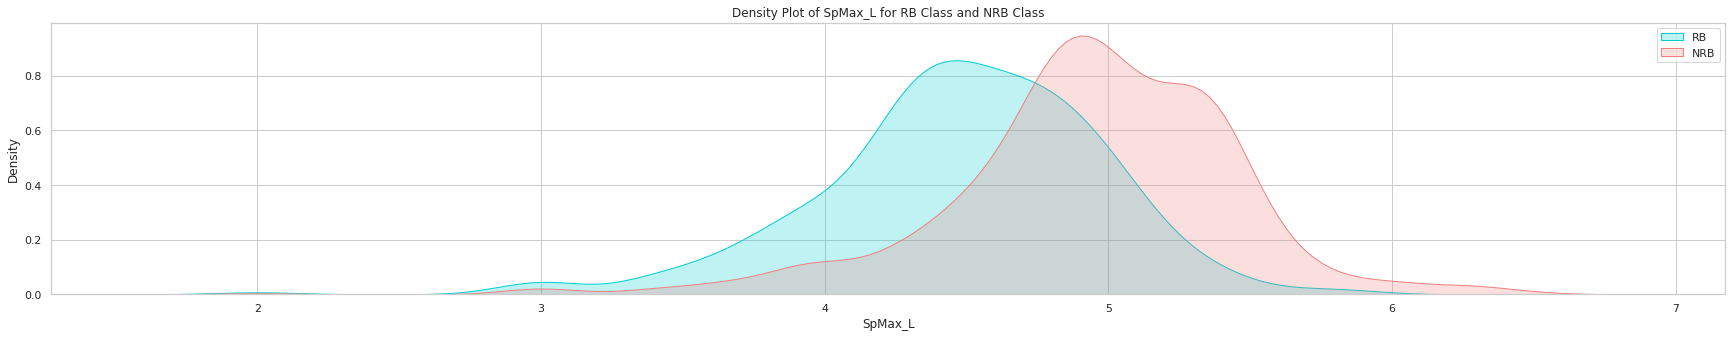

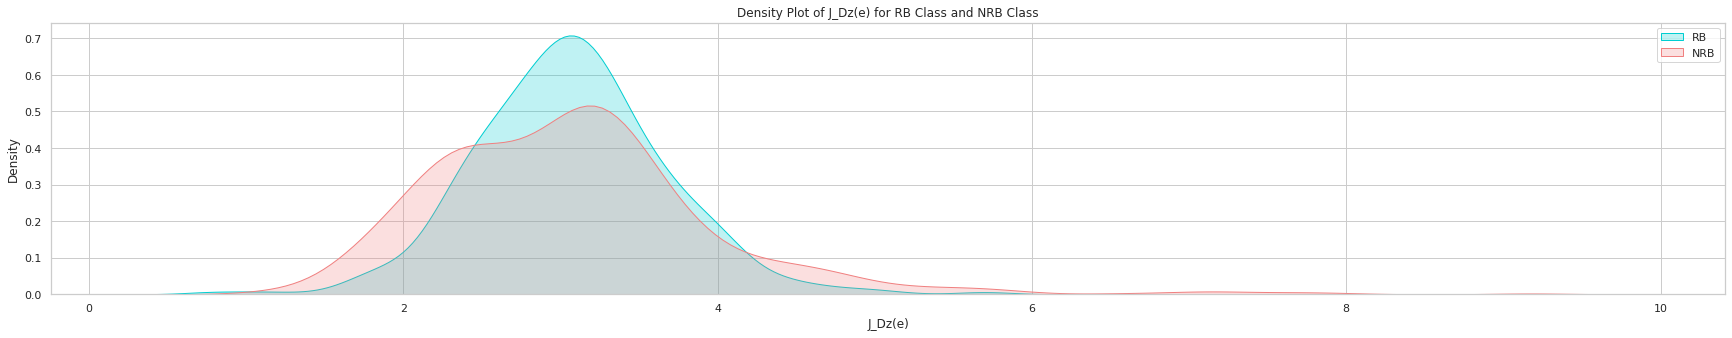

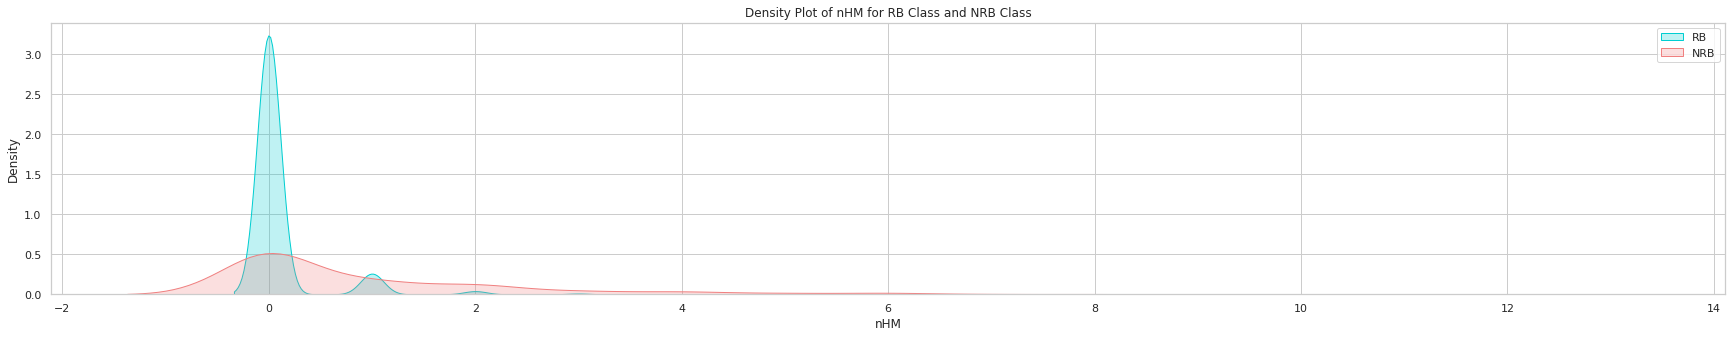

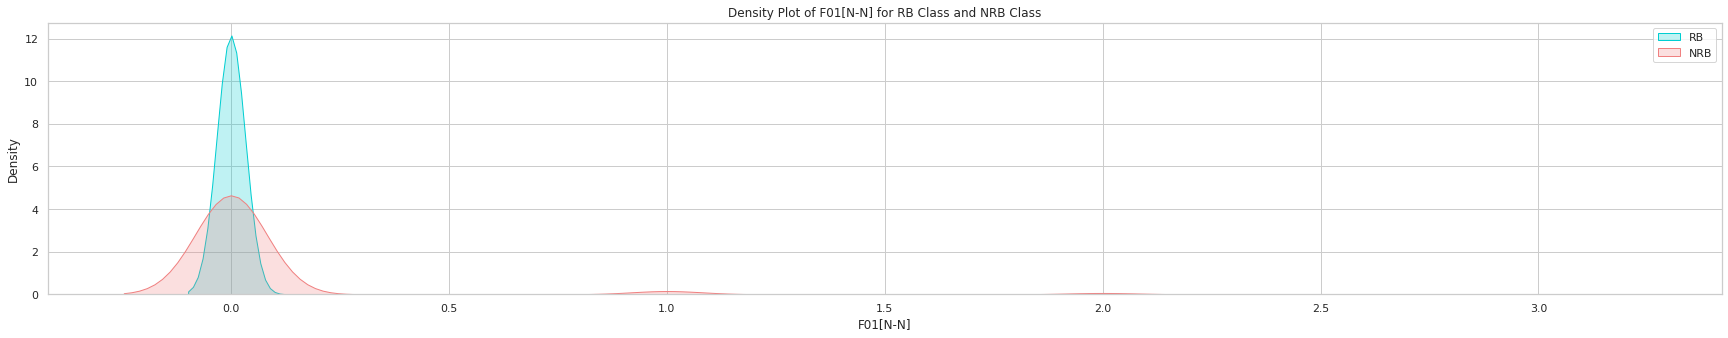

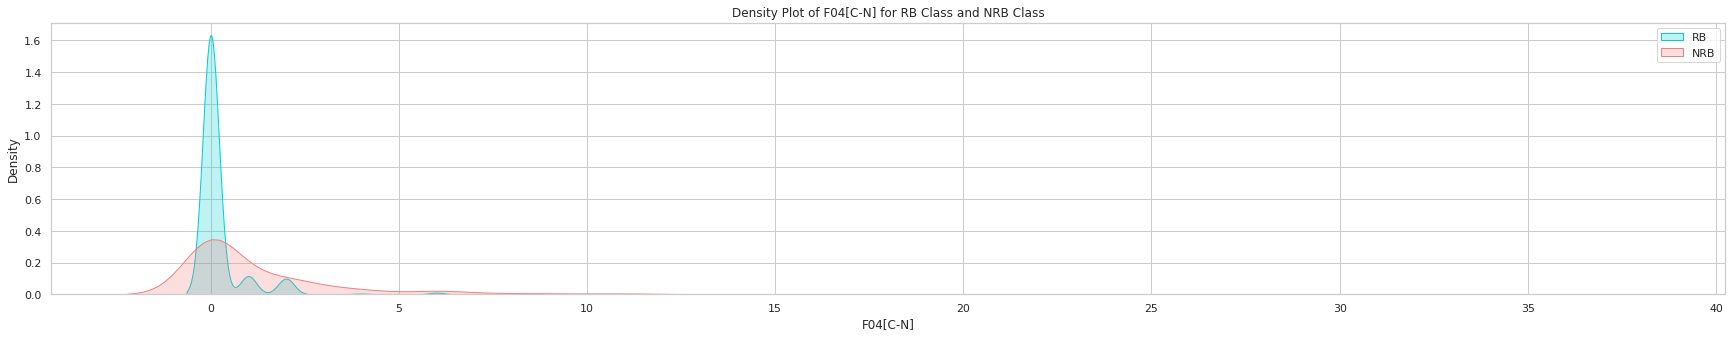

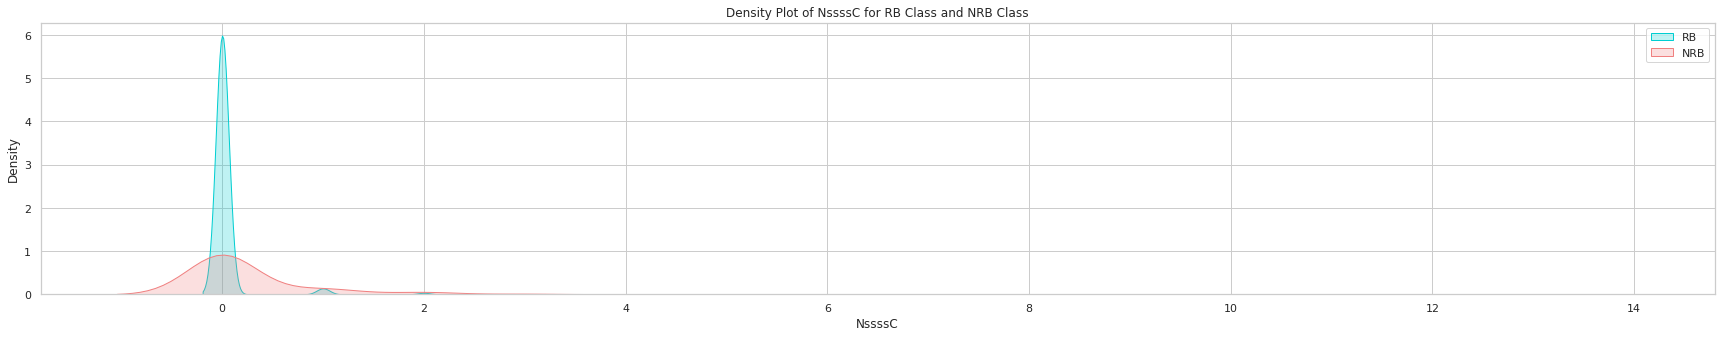

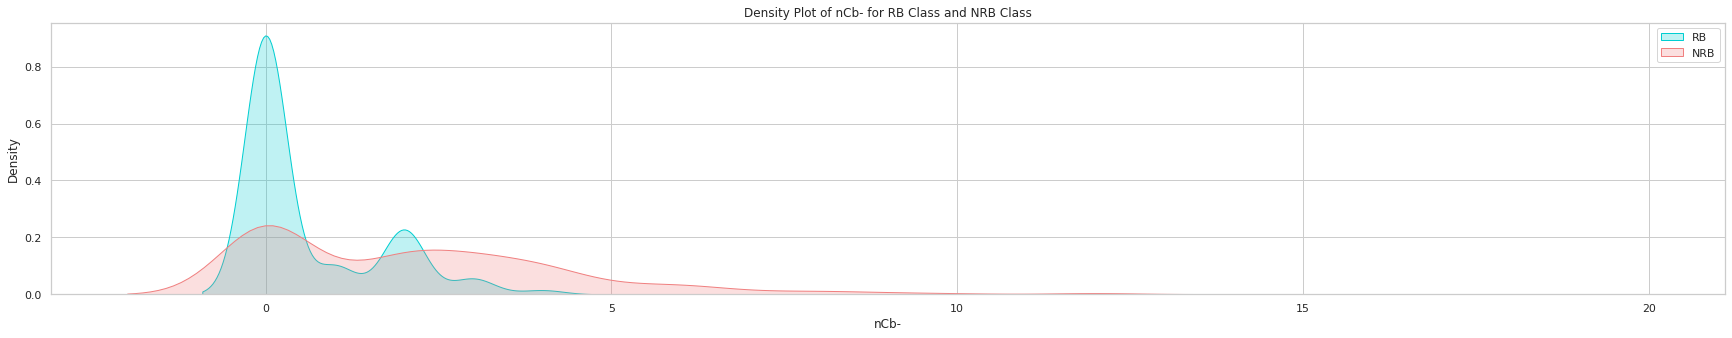

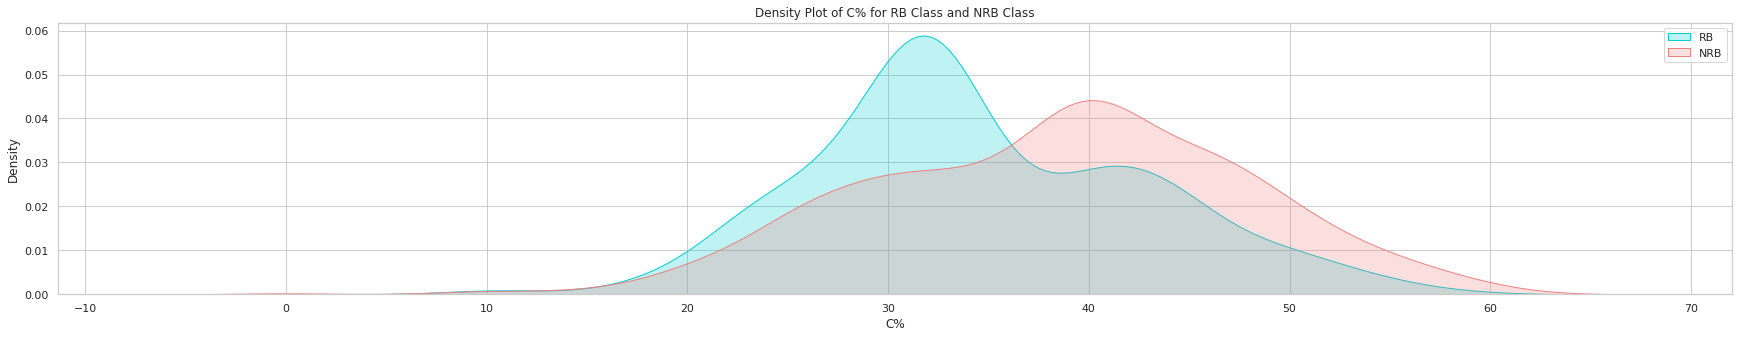

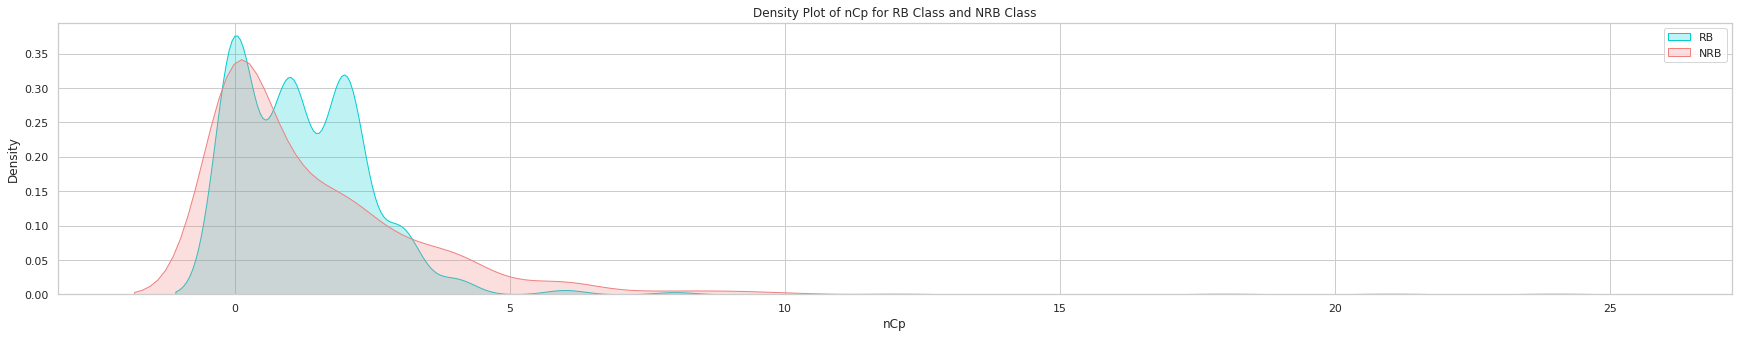

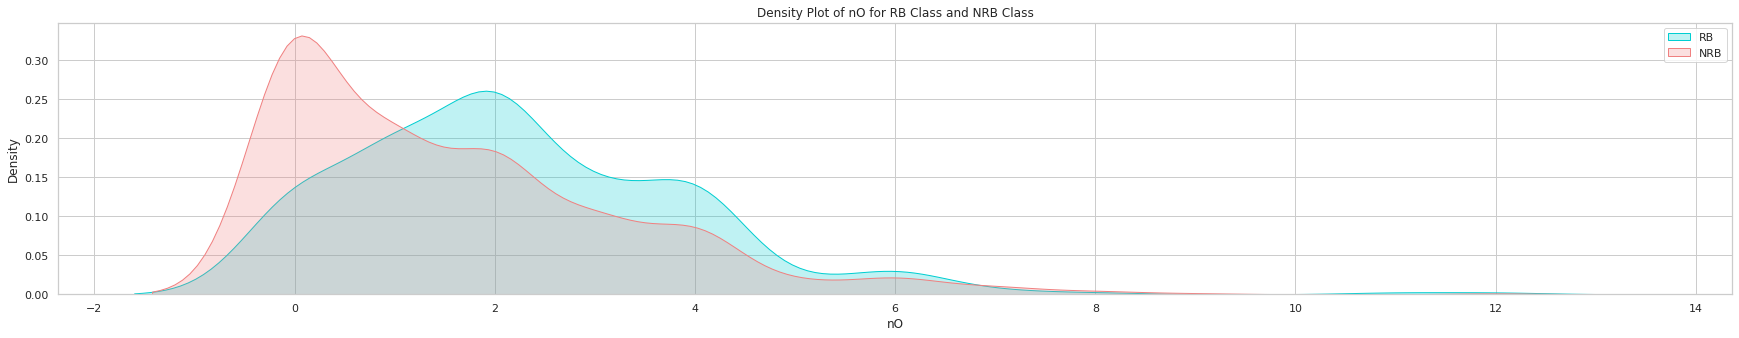

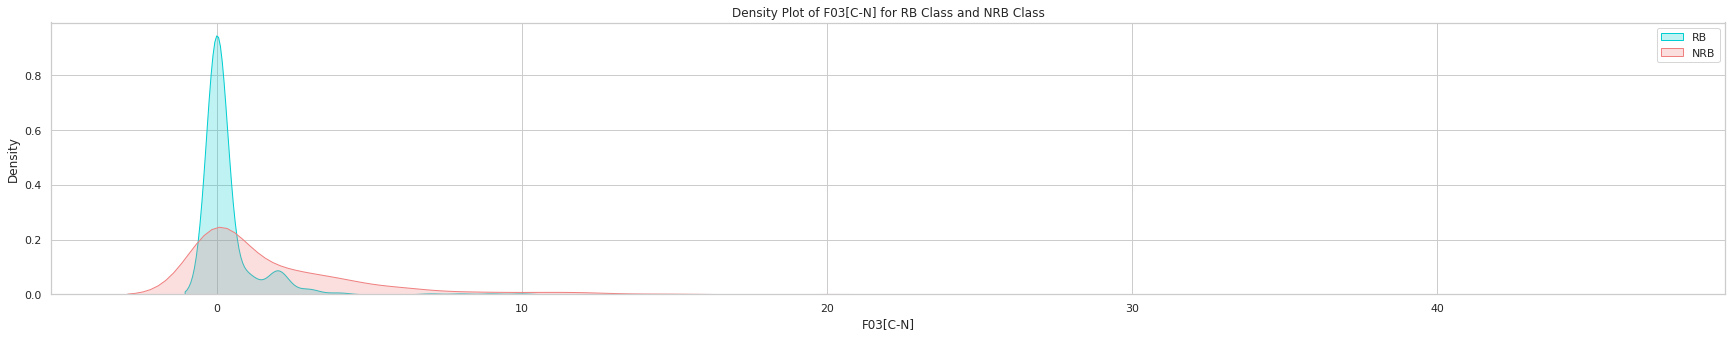

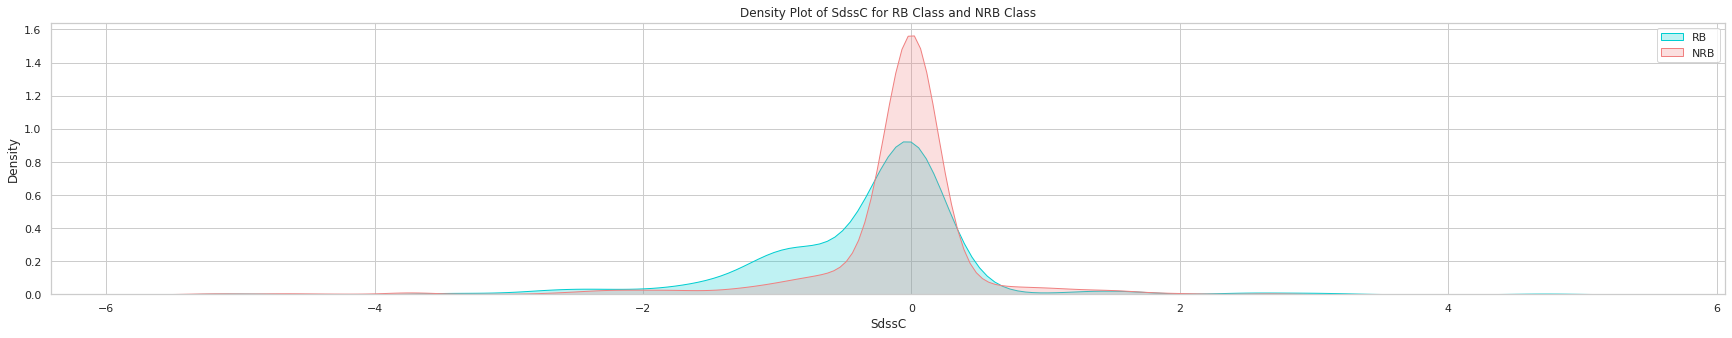

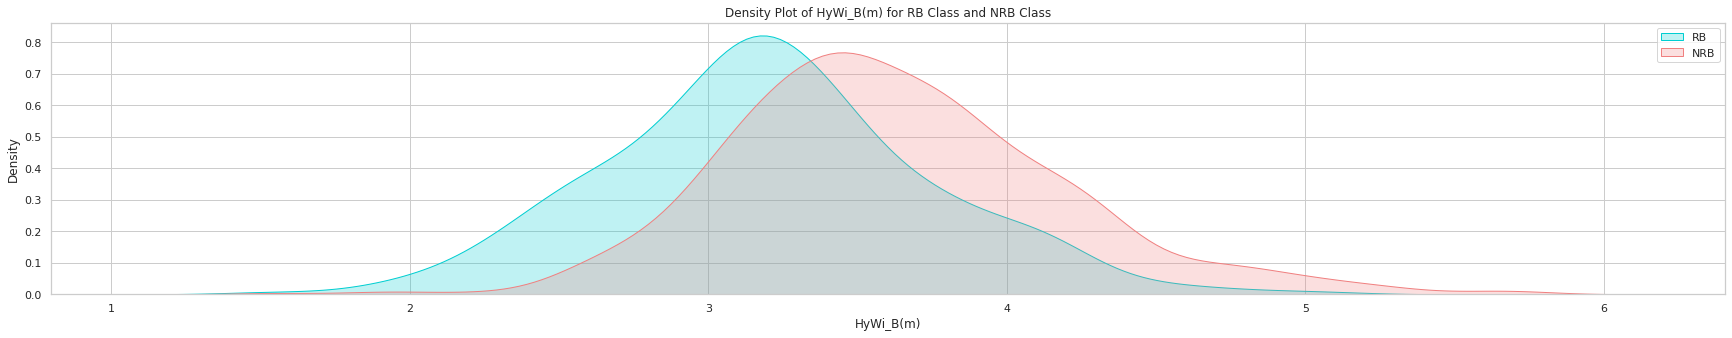

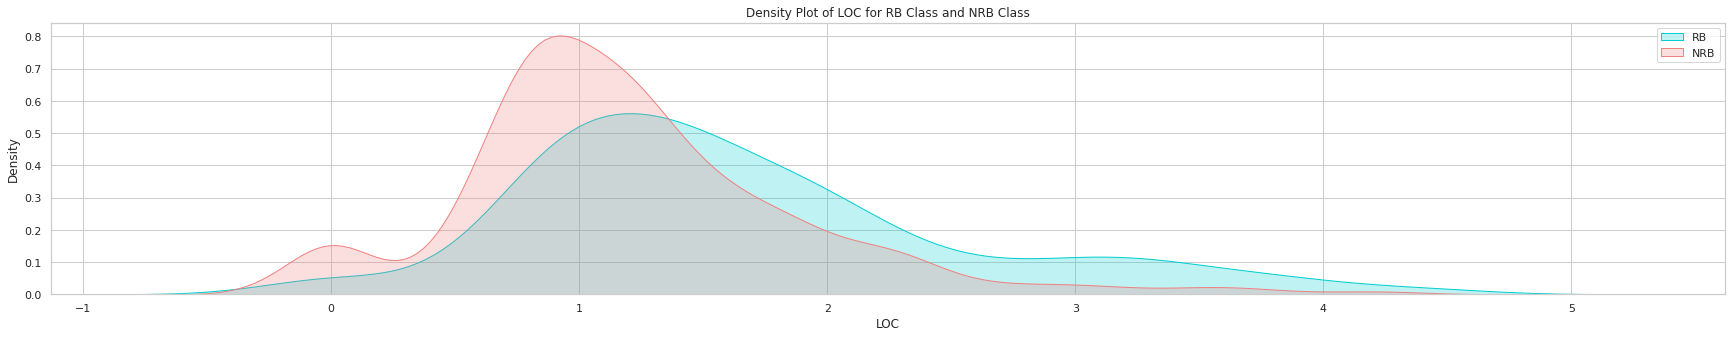

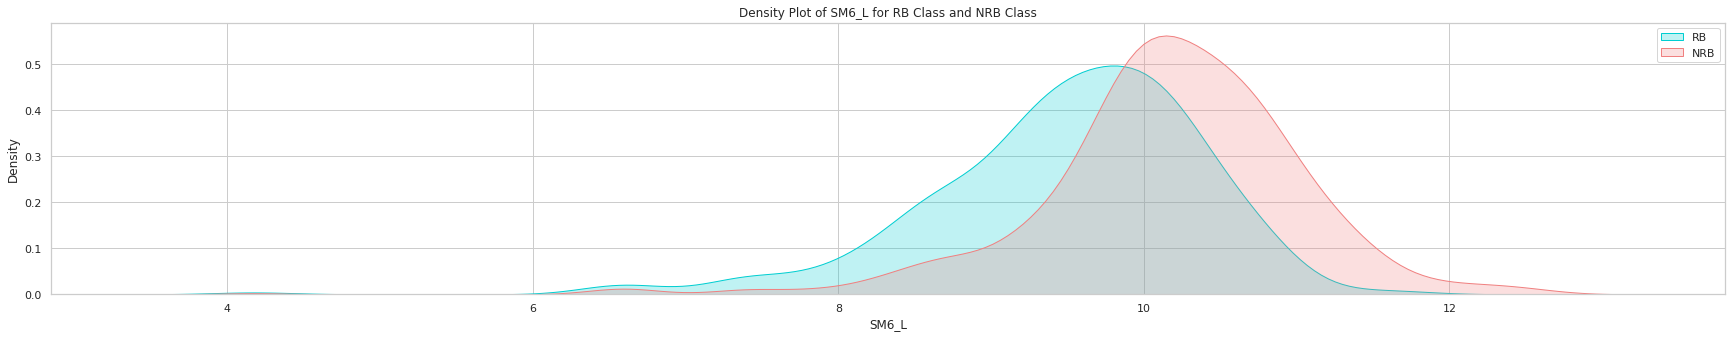

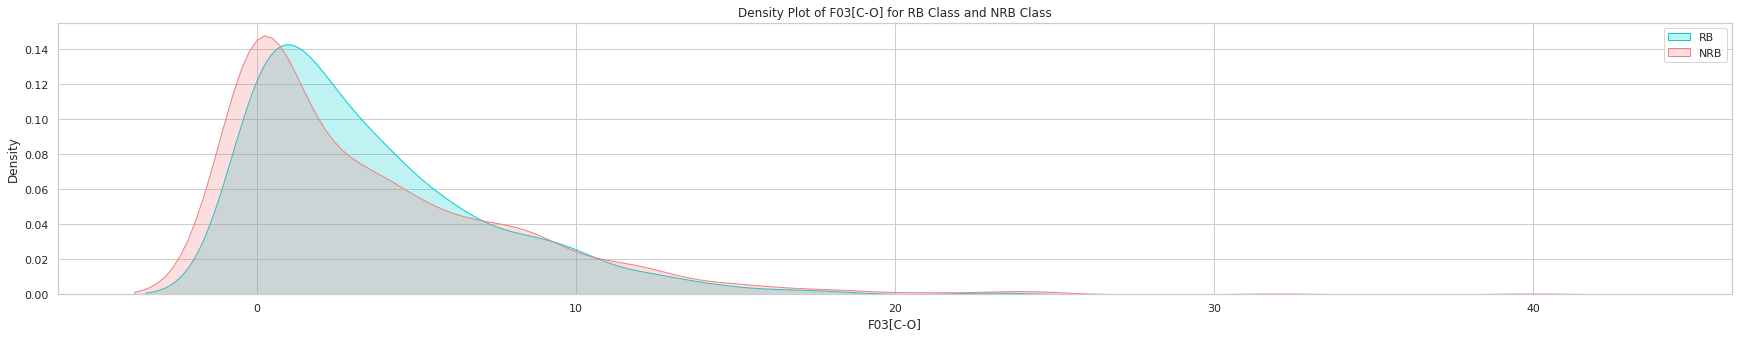

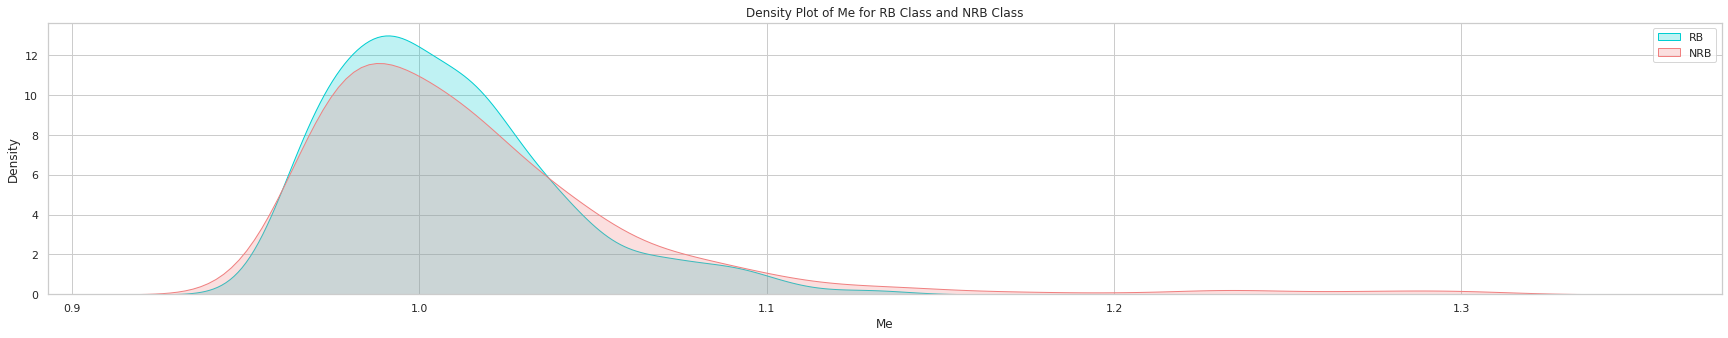

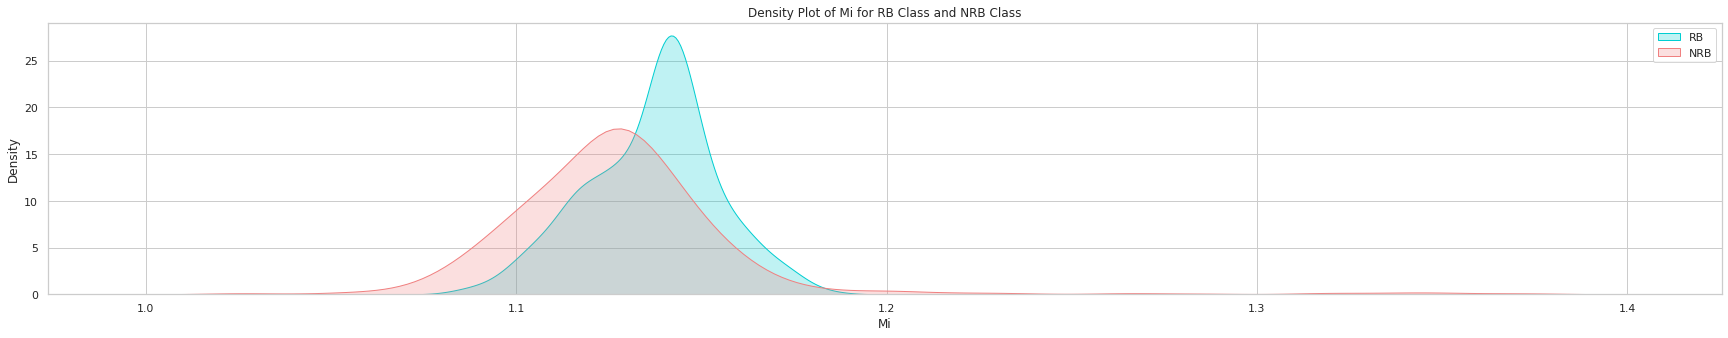

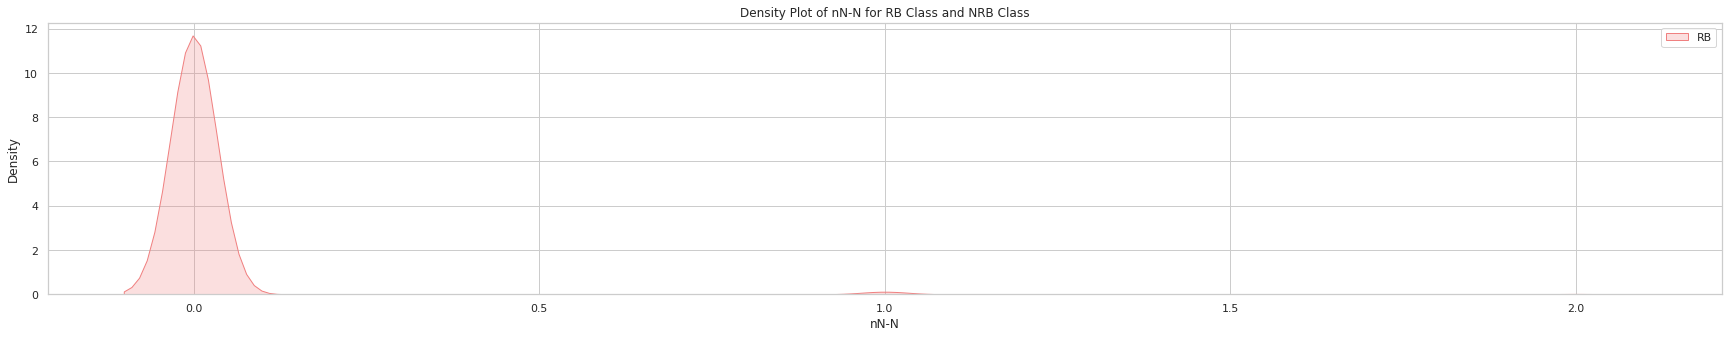

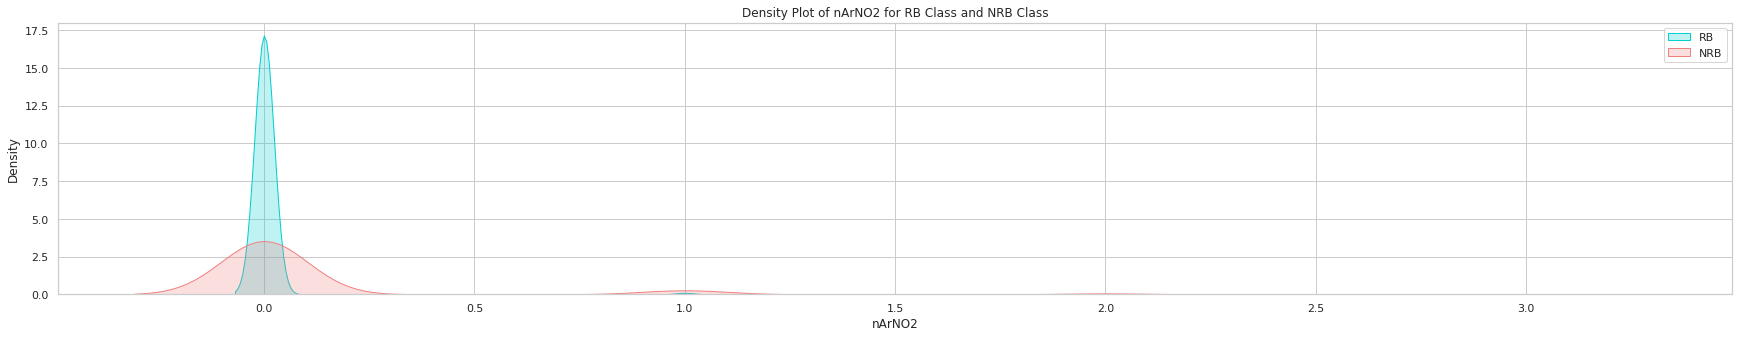

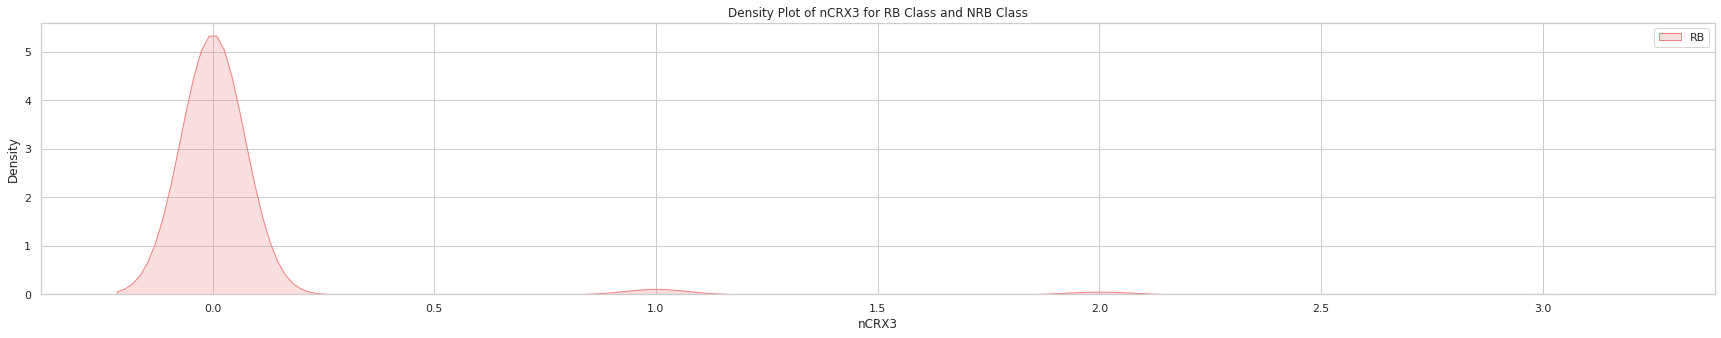

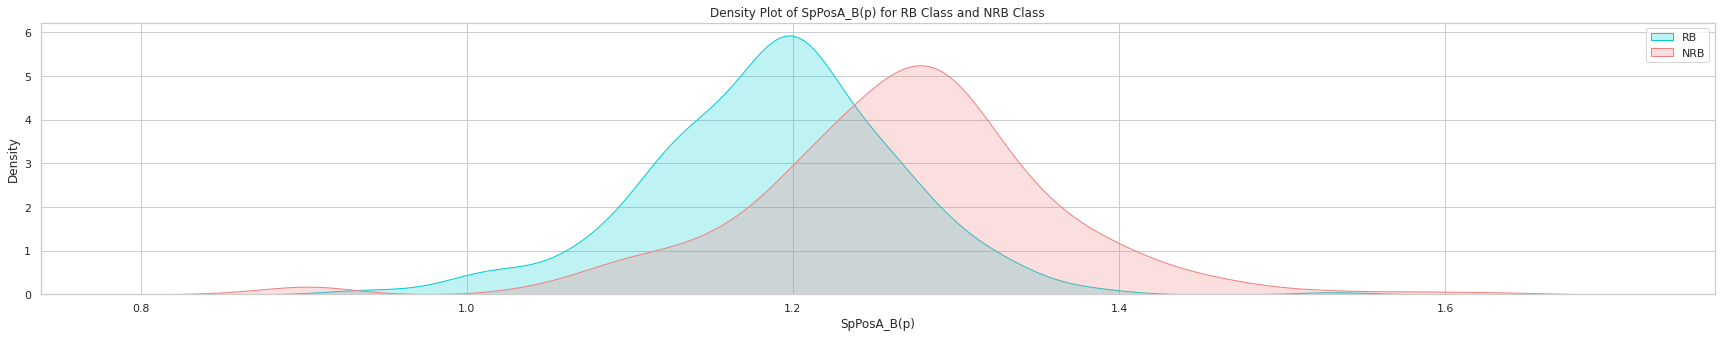

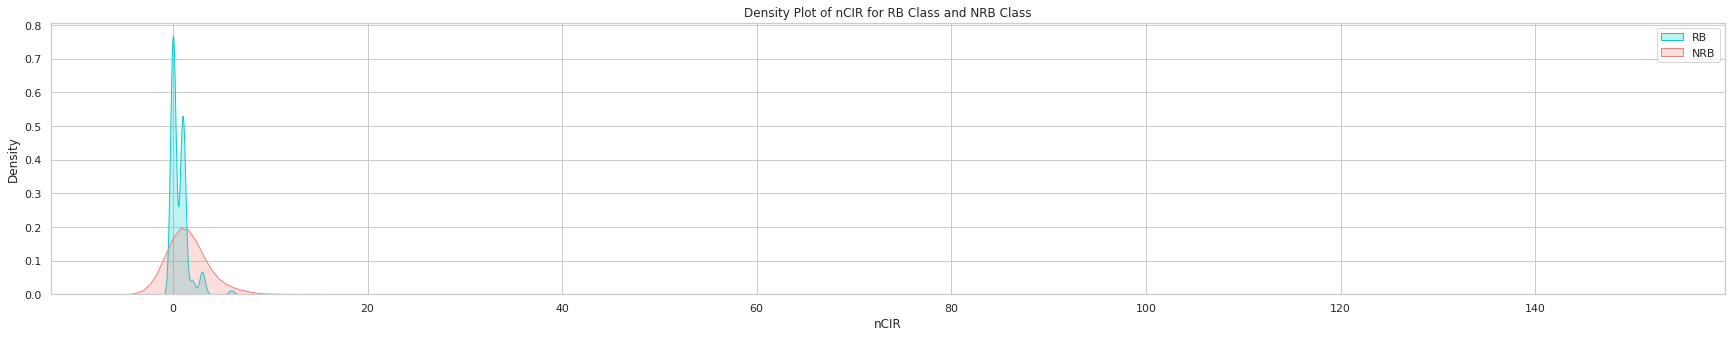

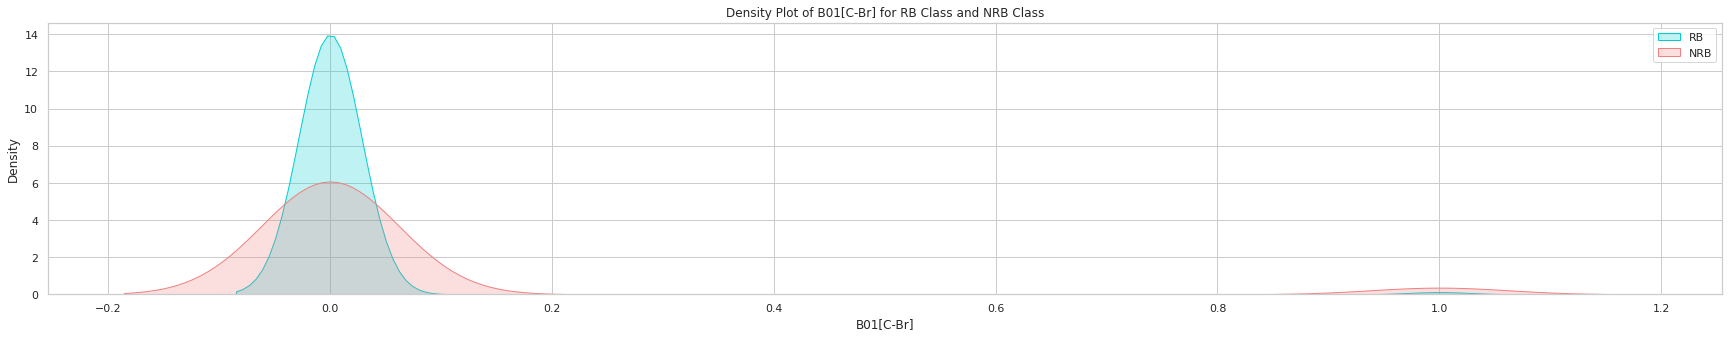

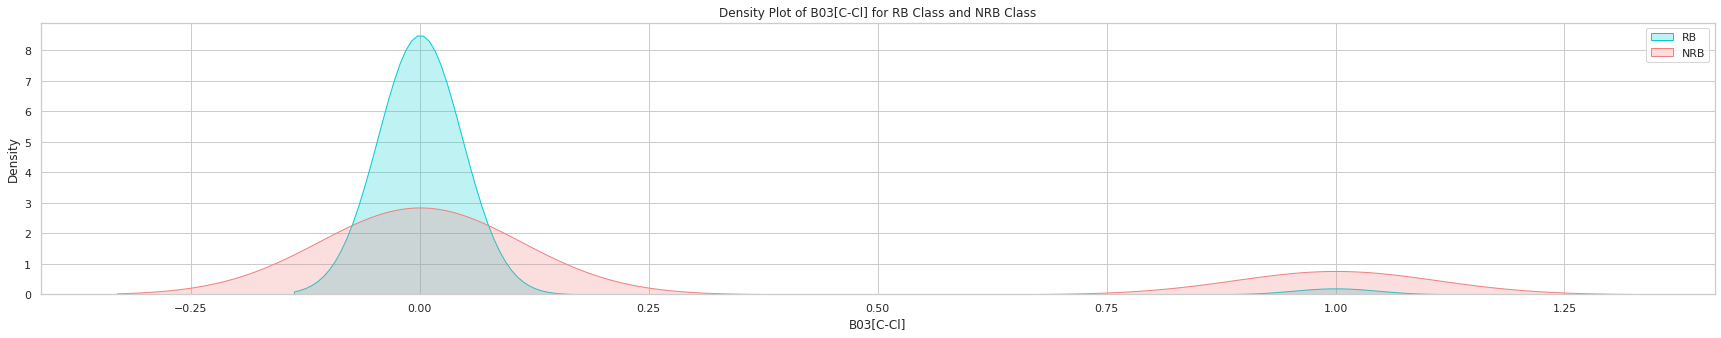

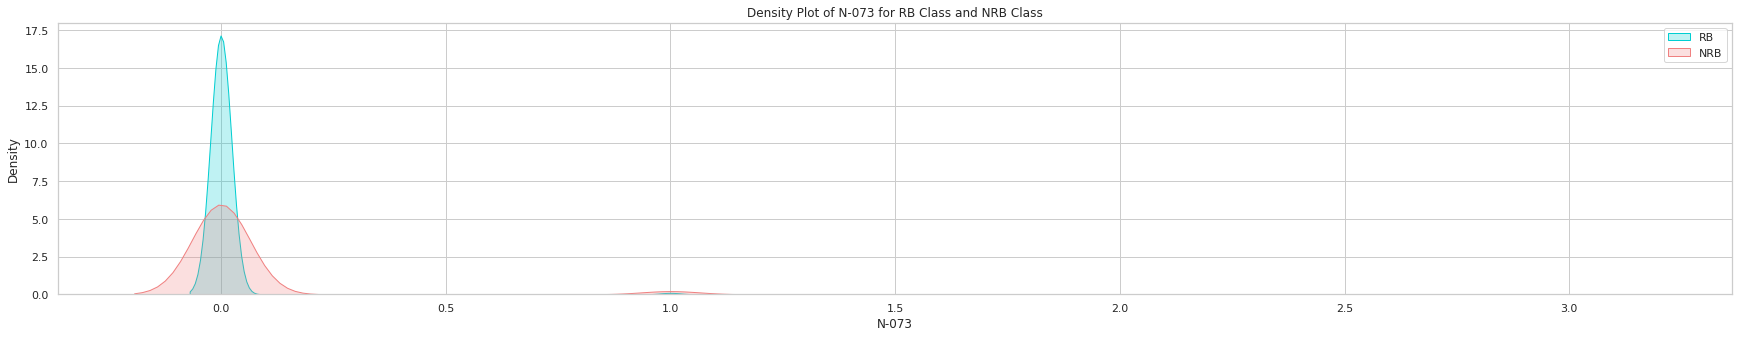

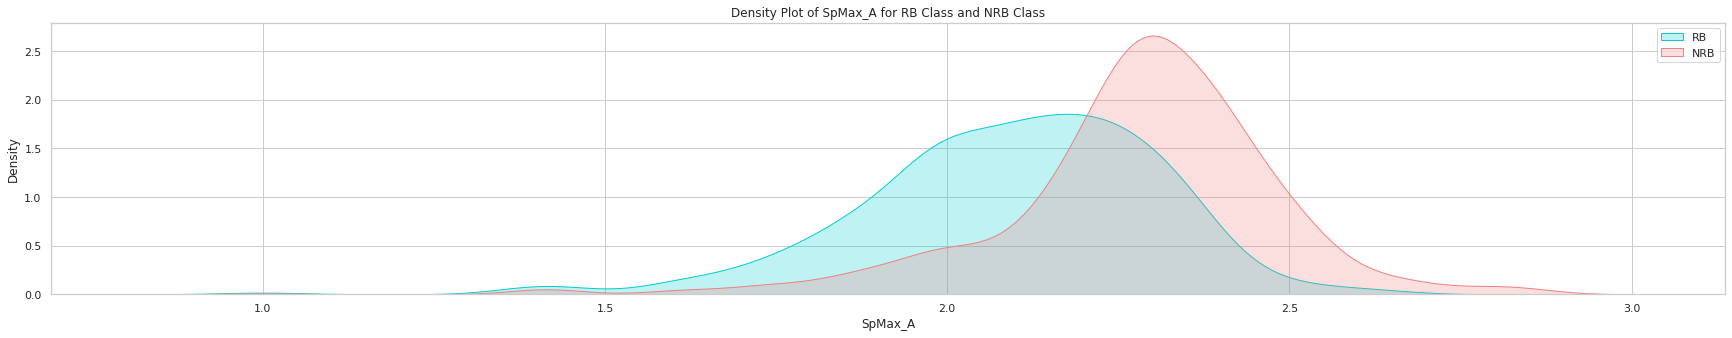

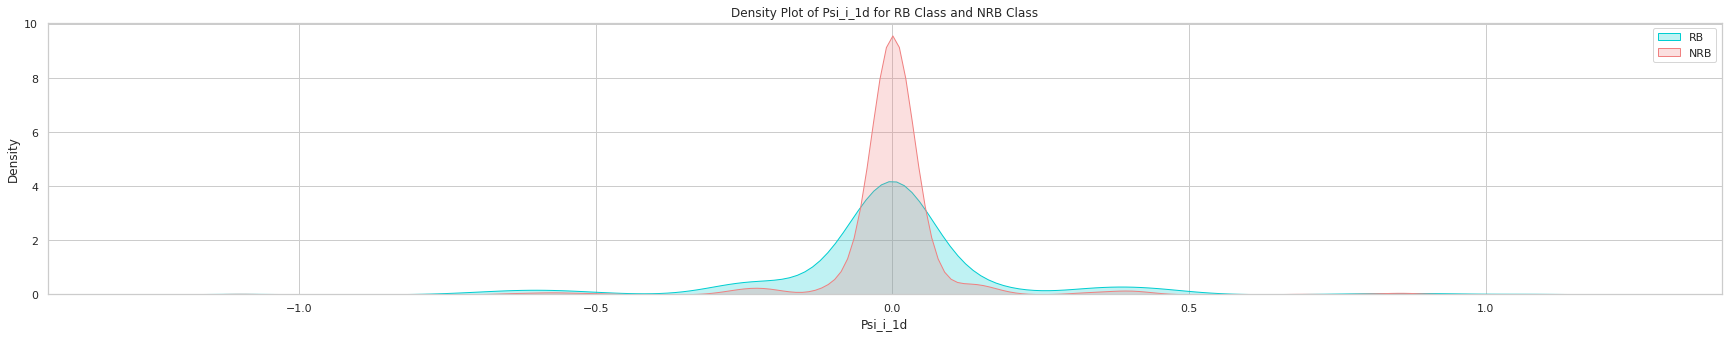

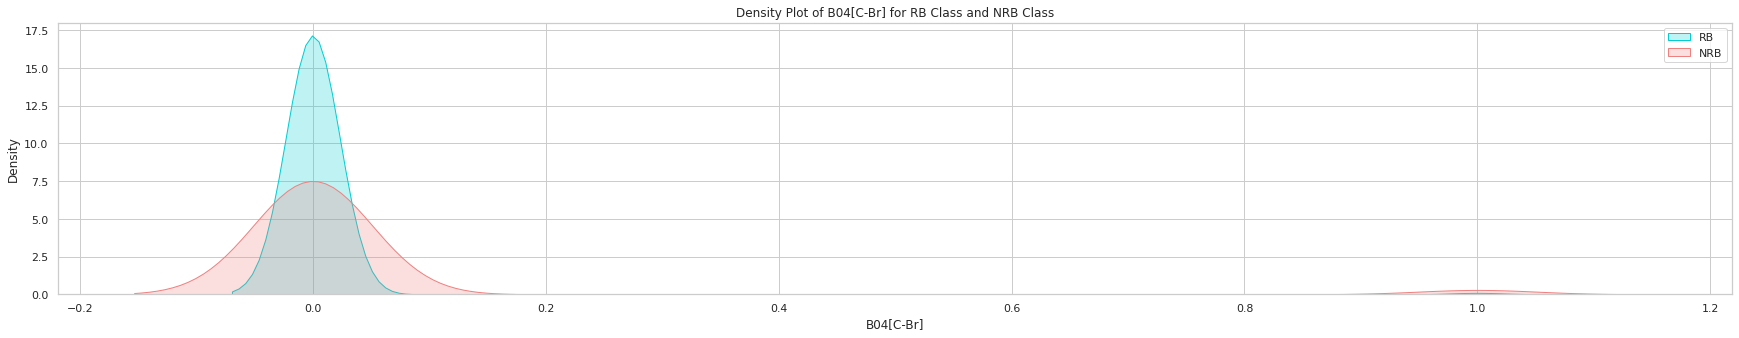

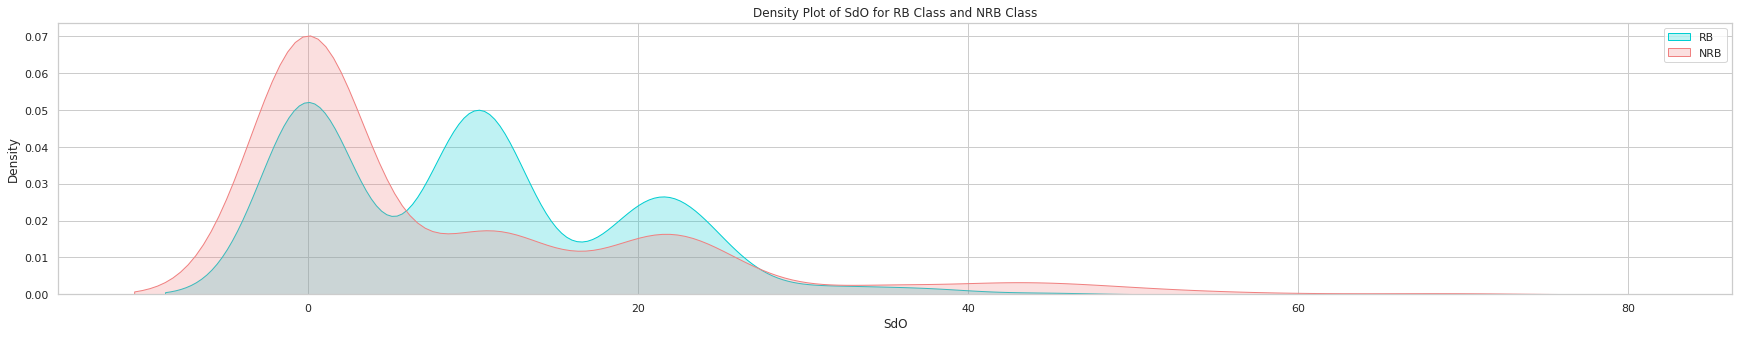

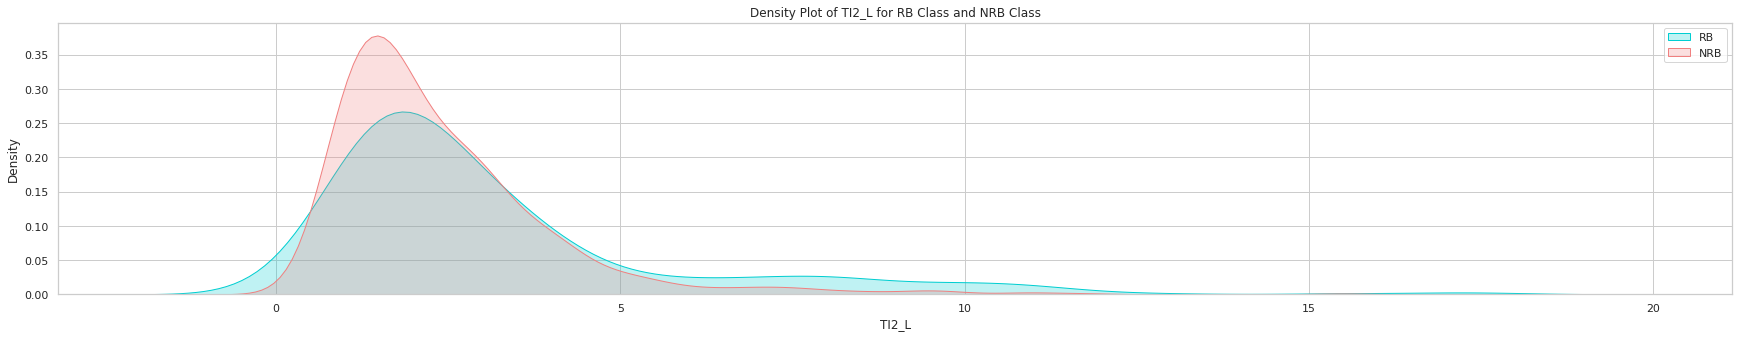

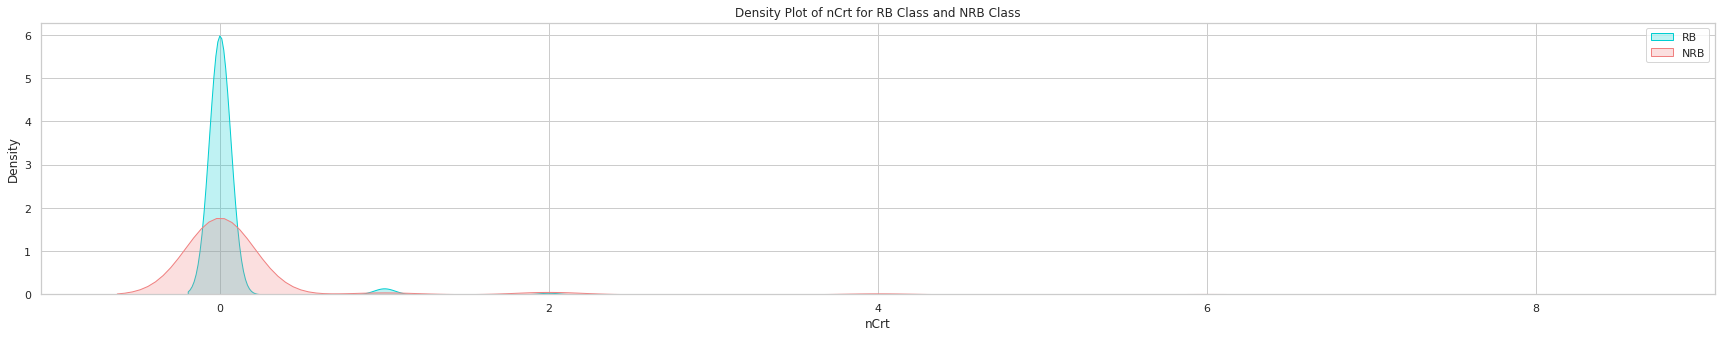

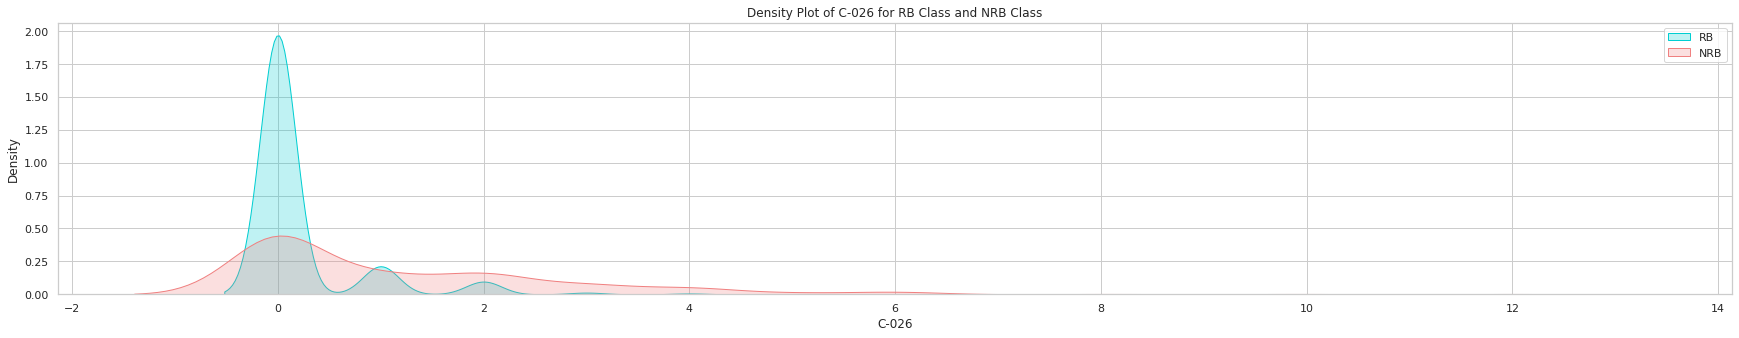

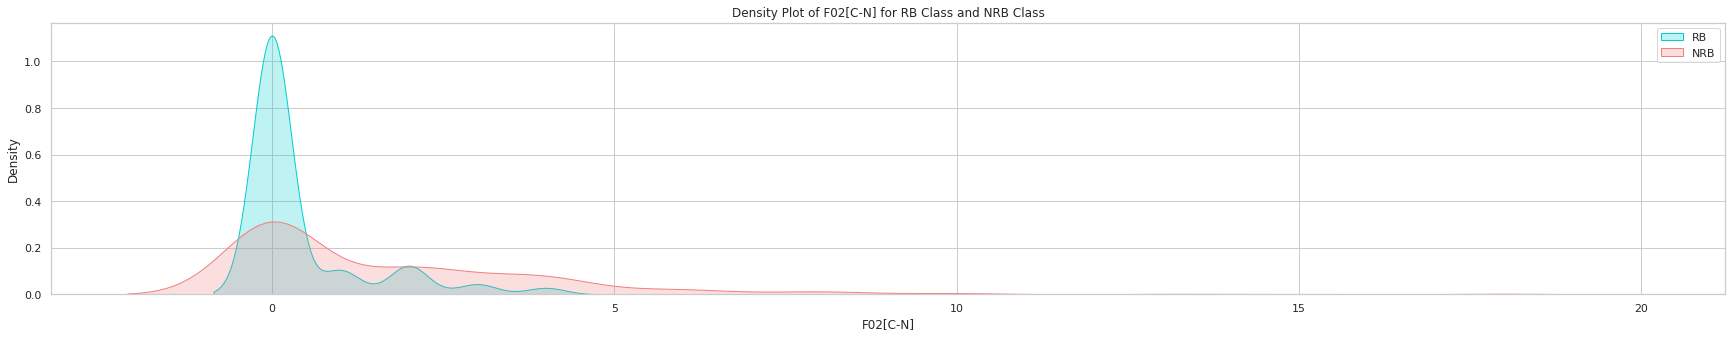

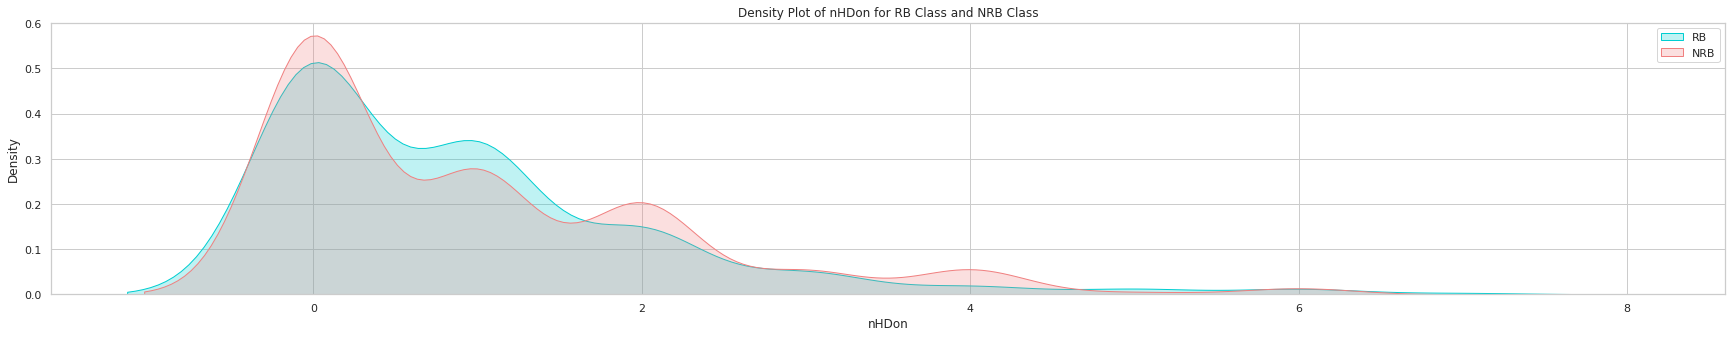

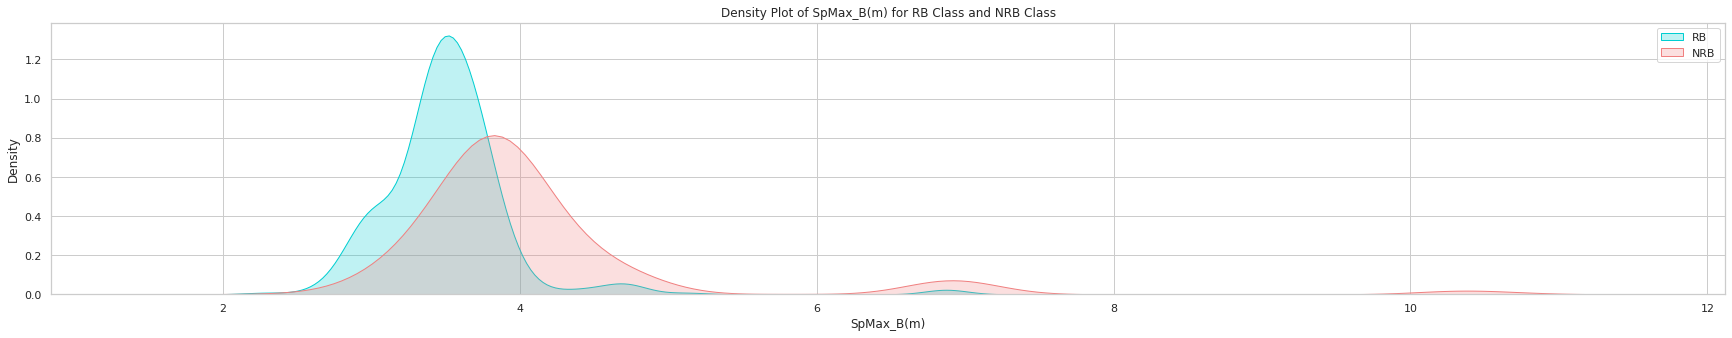

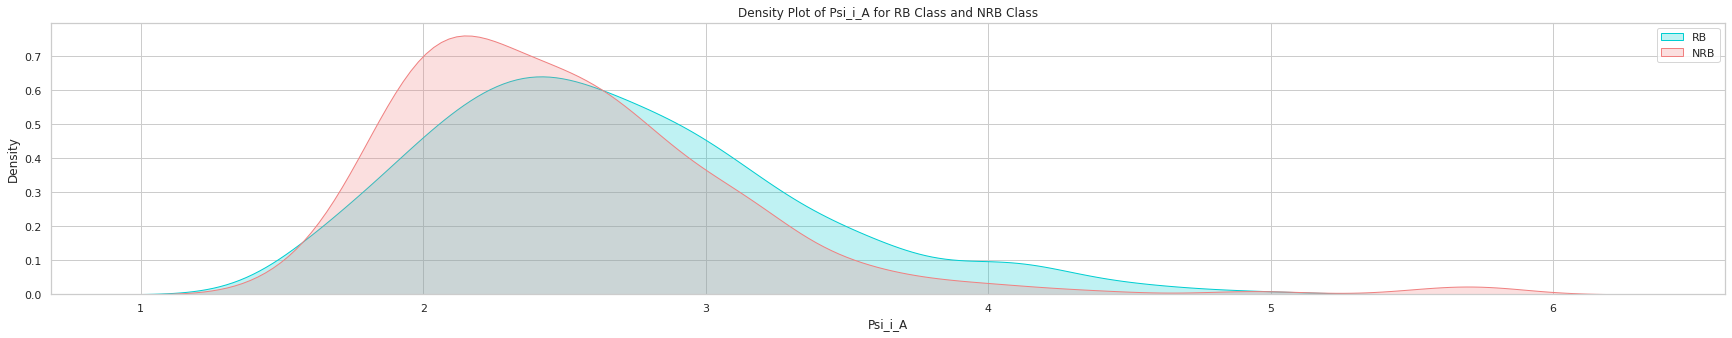

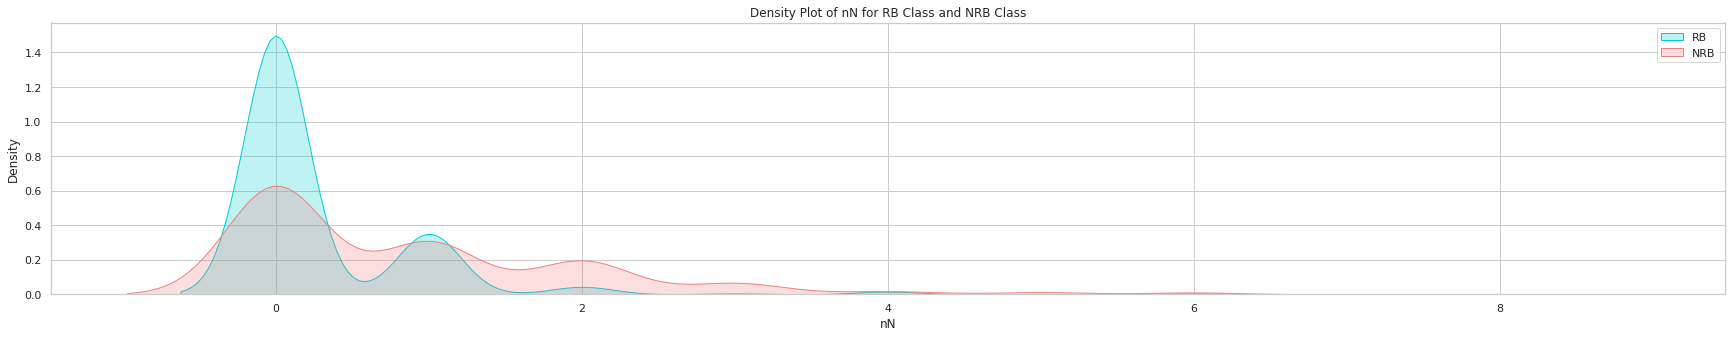

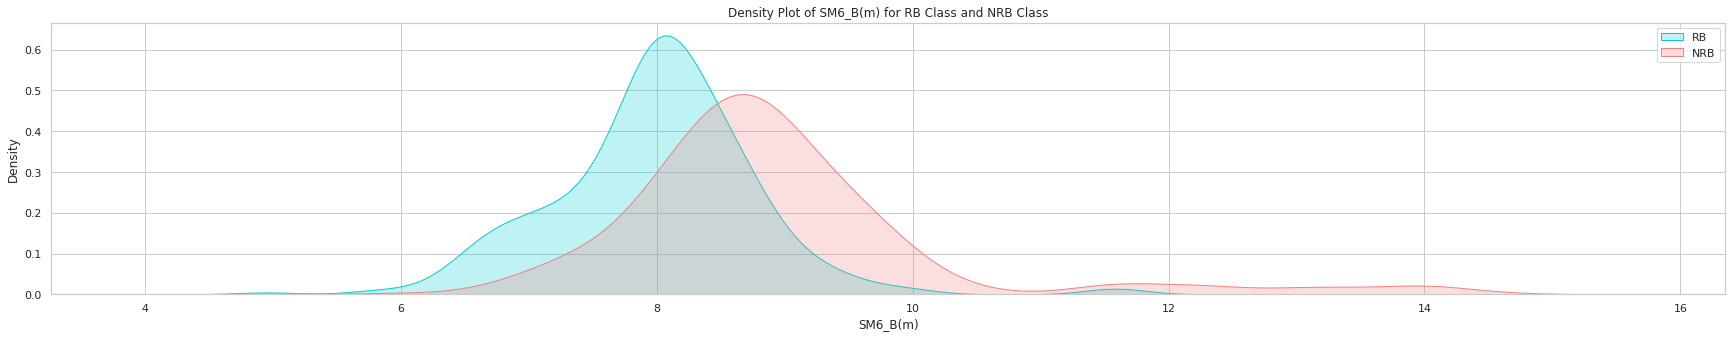

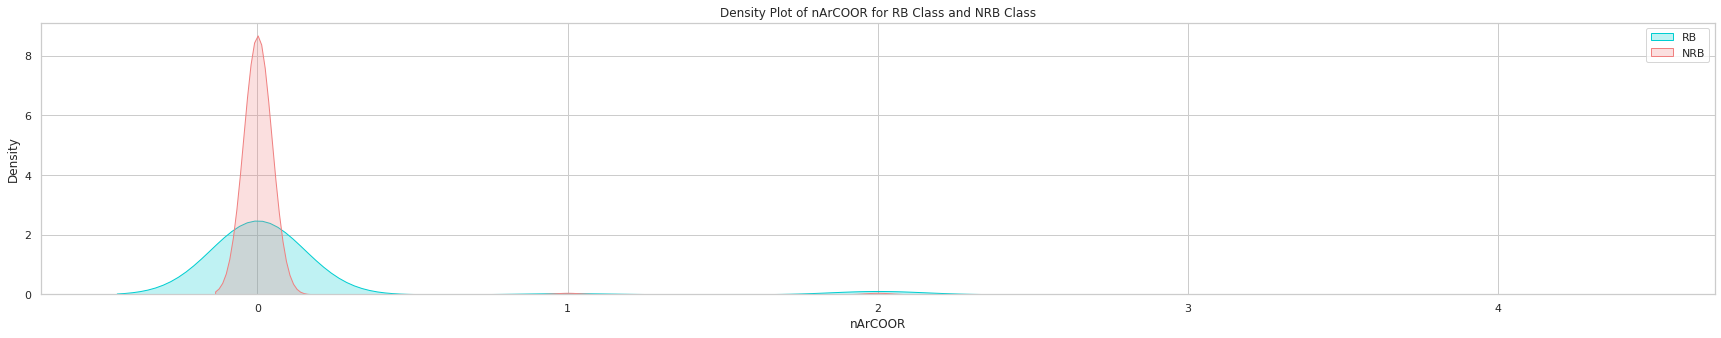

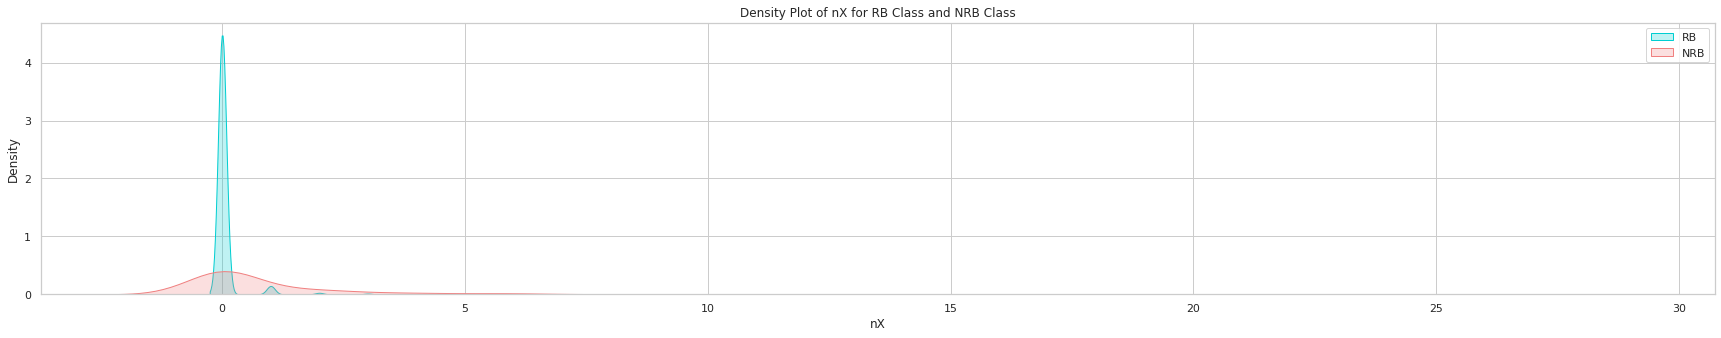

In [ ]:
for column in df_name:
  if column == 'experimental_class':
    continue
  plotBarCat(df, column)

### Feature Selection

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = df['experimental_class'].values
y_encoded = label_encoder.fit_transform(y_encoded)

X = df.drop(['experimental_class'], axis=1)
y = y_encoded
full_data = X.copy()
full_data['experimental_class'] = y

In [ ]:
important_features = full_data.drop('experimental_class', axis=1).apply(lambda x: x.corr(full_data.experimental_class))
indices = np.argsort(np.abs(important_features))

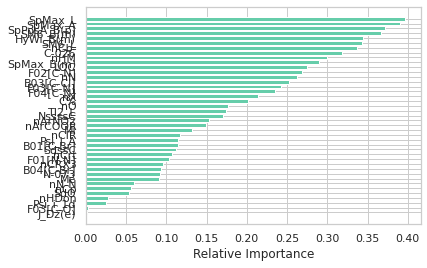

In [ ]:
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

names = X.columns
plt.barh(range(len(indices)), np.abs(important_features[indices]), color='mediumaquamarine', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.rcParams['figure.figsize'] = (35, 20)
plt.show()

In [ ]:
features = np.abs(important_features[indices[31:41]])
features = features.sort_values(ascending=False)
print(features)

SpMax_L        0.396138
SpMax_A        0.389951
SpPosA_B(p)    0.372254
SM6_B(m)       0.366793
HyWi_B(m)      0.343779
SM6_L          0.343377
nCb-           0.337268
C-026          0.318547
nHM            0.299107
SpMax_B(m)     0.289619
dtype: float64


In [ ]:
features = ['SpMax_L', 'SpMax_A', 'SpPosA_B(p)', 'SM6_B(m)', 'HyWi_B(m)', 'SM6_L', 'nCb-', 'C-026', 'nHM', 'SpMax_B(m)']

for feature in features:
  for next_feature in features:
    if feature != next_feature:
      correlation = np.abs(X[feature].corr(X[next_feature])) 
      if correlation < 0.3:
        print(f'{feature} is not correlated  with {next_feature}')
      elif correlation > 0.75:
        print(f'{feature} is highly correlated  with {next_feature}')

SpMax_L is highly correlated  with SpMax_A
SpMax_L is not correlated  with SpPosA_B(p)
SpMax_L is highly correlated  with SM6_L
SpMax_L is not correlated  with nHM
SpMax_A is highly correlated  with SpMax_L
SpMax_A is highly correlated  with SM6_L
SpMax_A is not correlated  with nHM
SpMax_A is not correlated  with SpMax_B(m)
SpPosA_B(p) is not correlated  with SpMax_L
SpPosA_B(p) is not correlated  with SM6_L
SM6_B(m) is highly correlated  with HyWi_B(m)
SM6_B(m) is highly correlated  with SpMax_B(m)
HyWi_B(m) is highly correlated  with SM6_B(m)
HyWi_B(m) is highly correlated  with SM6_L
SM6_L is highly correlated  with SpMax_L
SM6_L is highly correlated  with SpMax_A
SM6_L is not correlated  with SpPosA_B(p)
SM6_L is highly correlated  with HyWi_B(m)
SM6_L is not correlated  with nHM
SM6_L is not correlated  with SpMax_B(m)
nCb- is highly correlated  with C-026
nCb- is not correlated  with nHM
nCb- is not correlated  with SpMax_B(m)
C-026 is highly correlated  with nCb-
C-026 is not c

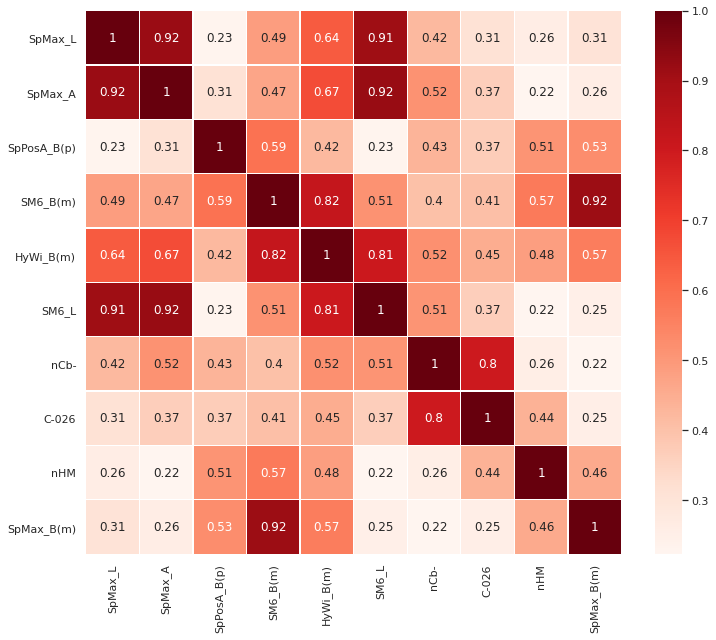

In [ ]:
plt.figure(figsize=(12,10))
new_df = df[features]
cor = new_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=0.35)
sns.set(font_scale=1.1)
plt.show()

The feature we choose are:

SpMax_L, 
SpMax_A,
SpPosA_B(p),
SM6_B(m),
HyWi_B(m),
SM6_L,
nCb-,
C-026,
nHM,
and SpMax_B(m)




### Fuzzy Logic

In [ ]:
pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894088 sha256=35620e54e67e425cbb099bc1e6c01ab02581cc92743c6a76d09cc5e9162b7804
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Auto-Generation Method

Create antecedent and consequent objects

In [ ]:
SpMax_L = ctrl.Antecedent(np.arange(3, 6.5, 0.5), 'SpMax_L')
SpMax_A = ctrl.Antecedent(np.arange(1.4, 2.9, 0.1), 'SpMax_A')
nHM = ctrl.Antecedent(np.arange(-1, 1, 0.1), 'nHM')
nCb = ctrl.Antecedent(np.arange(-3, 8.5, 0.5), 'nCb')
HyWi_B = ctrl.Antecedent(np.arange(1, 6.5, 0.5), 'HyWi_B')
SpPosA_B = ctrl.Antecedent(np.arange(0.9, 1.7, 0.1), 'SpPosA_B')
SM6_B = ctrl.Antecedent(np.arange(6, 13, 1), 'SM6_B')
SM6_L = ctrl.Antecedent(np.arange(7, 14, 1), 'SM6_L')
C026 = ctrl.Antecedent(np.arange(-1, 7.1, 0.1), 'C026')
SpMax_B = ctrl.Antecedent(np.arange(2, 11, 0.1), 'SpMax_B')

experimental_class = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'experimental_class')

Auto fuzzy membership functions

In [ ]:
SpMax_L.automf(3)
SpMax_A.automf(3)
nHM.automf(3)
nCb.automf(3)
HyWi_B.automf(3) 
SpPosA_B.automf(3)
SM6_B.automf(3)
SM6_L.automf(3)
C026.automf(3)
SpMax_B.automf(3)

experimental_class['nrb'] = fuzz.trapmf(experimental_class.universe, [0, 0, 0.3, 1])
experimental_class['rb'] = fuzz.trapmf(experimental_class.universe, [0, 0.7, 1, 1])

Visualize universe and membership functions

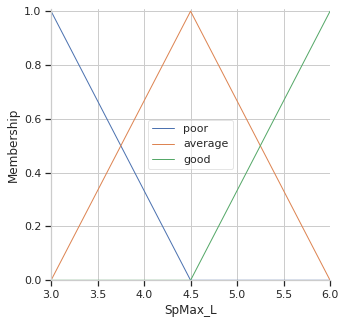

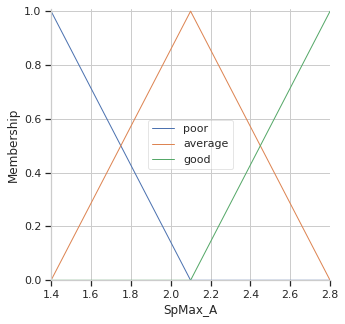

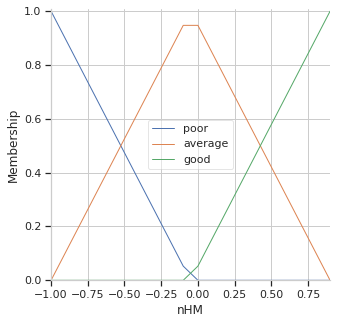

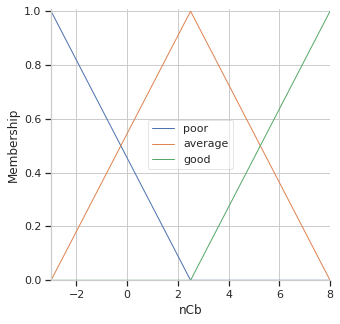

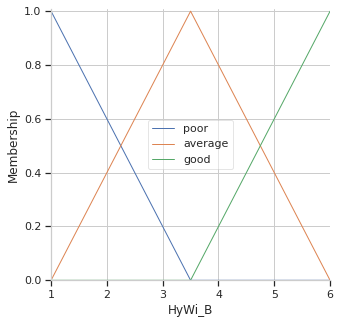

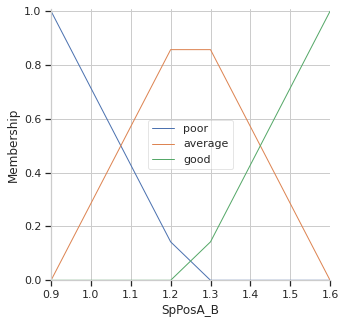

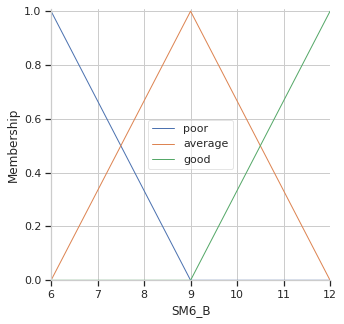

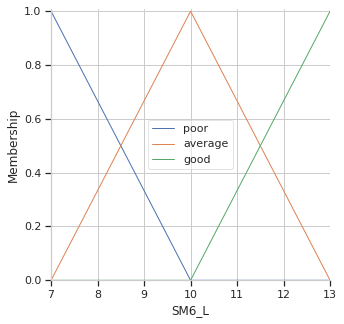

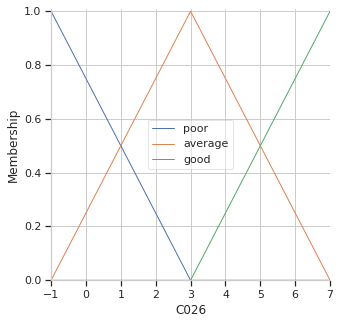

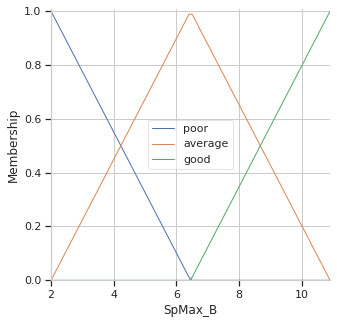

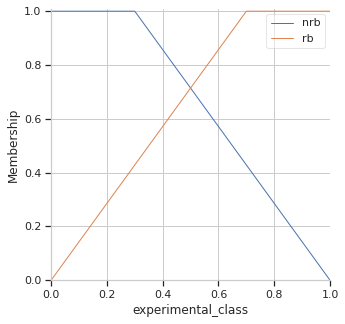

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)

sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

SpMax_L.view()
SpMax_A.view()
nHM.view()
nCb.view()
HyWi_B.view()
SpPosA_B.view()
SM6_B.view()
SM6_L.view()
C026.view()
SpMax_B.view()
experimental_class.view()

Rules of fuzzy memberships

In [ ]:
rb_rule1 = ctrl.Rule(SpMax_L['poor'] & nHM['average'], experimental_class['rb'])
rb_rule2 = ctrl.Rule(nCb['average'] & HyWi_B['poor'], experimental_class['rb'])
rb_rule3 = ctrl.Rule(SpPosA_B['poor'] & SpMax_A['average'], experimental_class['rb'])
rb_rule4 = ctrl.Rule(SM6_B['poor'] & SM6_L['poor'], experimental_class['rb'])
rb_rule5 = ctrl.Rule(C026['average'] & SpMax_B['poor'], experimental_class['rb'])

nrb_rule1 = ctrl.Rule(SpMax_L['good'] | nHM['good'], experimental_class['nrb'])
nrb_rule2 = ctrl.Rule(nCb['good'] | HyWi_B['good'], experimental_class['nrb'])
nrb_rule3 = ctrl.Rule(SpPosA_B['good'] | SpMax_A['good'], experimental_class['rb'])
nrb_rule4 = ctrl.Rule(SM6_B['good'] | SM6_L['good'],  experimental_class['nrb'])
nrb_rule5 = ctrl.Rule(C026['good'] | SpMax_B['good'],  experimental_class['nrb'])

In [ ]:
experimental_class_ctrl = ctrl.ControlSystem([rb_rule1, rb_rule2, rb_rule3, rb_rule4, rb_rule5, nrb_rule1, nrb_rule2, nrb_rule3, nrb_rule4, nrb_rule5])

In [ ]:
experimental = ctrl.ControlSystemSimulation(experimental_class_ctrl)

In [ ]:
experimental.input['SpMax_L'] = 4
experimental.input['SpMax_A'] = 2
experimental.input['nHM'] = 0.1
experimental.input['SpPosA_B'] = 1.2
experimental.input['nCb'] = 0.2
experimental.input['HyWi_B'] = 3.2
experimental.input['SM6_B'] = 4
experimental.input['SM6_L'] = 7
experimental.input['C026'] = 0
experimental.input['SpMax_B'] = 3.5

experimental.compute()

RB: 0.6350437096161154


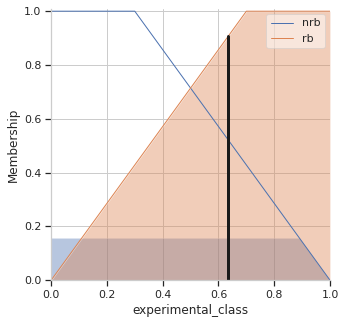

In [ ]:
percentage = experimental.output['experimental_class']
if percentage > 0.5:
  print(f'RB: {percentage}')
else: 
  print(f'NRB: {percentage}')

sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

experimental_class.view(sim=experimental)

### Self-Generation Method

Generate universe variables

In [ ]:
SpMax_L = np.arange(3, 6.5, 0.5)
SpMax_A = np.arange(1.4, 2.85, 0.1)
nHM = np.arange(-1, 1, 0.1)
nCb = np.arange(-3, 8.5, 0.5)
HyWi_B = np.arange(1, 6.5, 0.5)   
SpPosA_B = np.arange(0.9, 1.7, 0.1)
SM6_B = np.arange(6, 13, 1)
SM6_L = np.arange(7, 14, 1)
C026 =  np.arange(-1, 7.1, 0.1)
SpMax_B = np.arange(2, 11, 0.1)

experimental_class = np.arange(0, 1.1, 0.1)

Generate fuzzy membership functions

In [ ]:
SpMax_L_lo = fuzz.trapmf(SpMax_L, [3, 3, 4, 5])
SpMax_L_md = fuzz.trimf(SpMax_L, [3, 4.5, 6])
SpMax_L_hi = fuzz.trapmf(SpMax_L, [4, 5, 6, 6])

SpMax_A_lo = fuzz.trapmf(SpMax_A, [1.4, 1.4, 1.8, 2])
SpMax_A_md = fuzz.trapmf(SpMax_A, [1.8, 2, 2.4, 2.6])
SpMax_A_hi = fuzz.trapmf(SpMax_A, [2.2, 2.4, 2.9, 2.9])

nHM_lo = fuzz.trapmf(nHM, [-1, -1, -0.4, 0])
nHM_md = fuzz.trimf(nHM, [-0.4, 0, 0.4])
nHM_hi = fuzz.trapmf(nHM, [0, 0.4, 1, 1])

nCb_lo = fuzz.trapmf(nCb, [-3, -3, -1, -0.5])
nCb_md = fuzz.trapmf(nCb, [-1, 0, 0, 3.5])
nCb_hi = fuzz.trapmf(nCb, [2.5, 5, 8, 8])

HyWi_B_lo = fuzz.trapmf(HyWi_B, [1, 1, 1, 3.5])
HyWi_B_md = fuzz.trapmf(HyWi_B, [2.5, 3, 3.5, 4])
HyWi_B_hi = fuzz.trapmf(HyWi_B, [3.5, 6, 6, 6])

SpPosA_B_lo = fuzz.trapmf(SpPosA_B, [0.9, 0.9, 1.2, 1.3])
SpPosA_B_md = fuzz.trapmf(SpPosA_B, [1.1, 1.2, 1.3, 1.4])
SpPosA_B_hi = fuzz.trapmf(SpPosA_B, [1.2, 1.3, 1.6, 1.6])

SM6_B_lo = fuzz.trapmf(SM6_B, [6, 6, 8, 10])
SM6_B_md = fuzz.trapmf(SM6_B, [7, 8, 9, 10])
SM6_B_hi = fuzz.trapmf(SM6_B, [8, 10, 12, 12])

SM6_L_lo = fuzz.trapmf(SM6_L, [7, 7, 9, 10])
SM6_L_md = fuzz.trimf(SM6_L, [9, 10, 11])
SM6_L_hi = fuzz.trapmf(SM6_L, [10, 11, 13, 13])

C026_lo = fuzz.trapmf(C026, [-1, -1, -0.5, -0.25])
C026_md = fuzz.trapmf(C026, [-0.5, -0.25, 0.25, 0.5])
C026_hi = fuzz.trapmf(C026, [0.25, 2, 7, 7])

SpMax_B_lo = fuzz.trapmf(SpMax_B, [2, 2, 2.5, 3.5])
SpMax_B_md = fuzz.trapmf(SpMax_B, [2.5, 3.5, 4.8, 5])
SpMax_B_hi = fuzz.trapmf(SpMax_B, [4.8, 5, 11, 11])

experimental_class_nrb = fuzz.trapmf(experimental_class, [0, 0, 0.3, 1])
experimental_class_rb = fuzz.trapmf(experimental_class, [0, 0.7, 1, 1])

Visualize universe and membership functions

In [ ]:
def visualize_mf(feature, memberships, name):
  fig, (ax) = plt.subplots(nrows=1, figsize=(4, 4))

  for membership, color, label in memberships:
    ax.plot(feature, membership, color, linewidth=1.5, label=label)
  ax.set_title(name)
  ax.legend()

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.get_xaxis().tick_bottom()
  ax.get_yaxis().tick_left()

  plt.tight_layout()

In [ ]:
plt.rc('font', size=14)
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

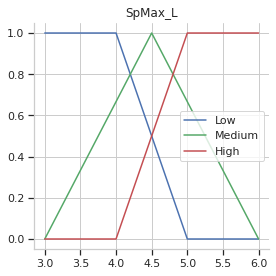

In [ ]:
memberships = [(SpMax_L_lo, 'b', 'Low'), (SpMax_L_md, 'g', 'Medium'), (SpMax_L_hi, 'r', 'High')]
visualize_mf(SpMax_L, memberships, 'SpMax_L')

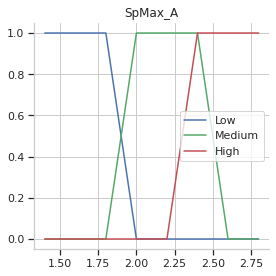

In [ ]:
memberships = [(SpMax_A_lo, 'b', 'Low'), (SpMax_A_md, 'g', 'Medium'), (SpMax_A_hi, 'r', 'High')]
visualize_mf(SpMax_A, memberships, 'SpMax_A')

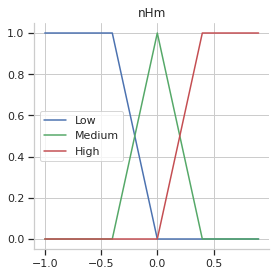

In [ ]:
memberships = [(nHM_lo, 'b', 'Low'), (nHM_md, 'g', 'Medium'), (nHM_hi, 'r', 'High')]
visualize_mf(nHM, memberships, 'nHm')

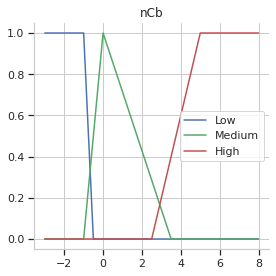

In [ ]:
memberships = [(nCb_lo, 'b', 'Low'), (nCb_md, 'g', 'Medium'), (nCb_hi, 'r', 'High')]
visualize_mf(nCb, memberships, 'nCb')

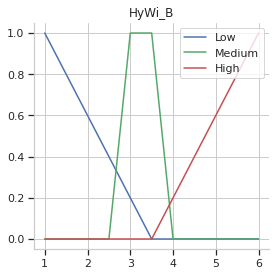

In [ ]:
memberships = [(HyWi_B_lo, 'b', 'Low'), (HyWi_B_md, 'g', 'Medium'), (HyWi_B_hi, 'r', 'High')]
visualize_mf(HyWi_B, memberships, 'HyWi_B')

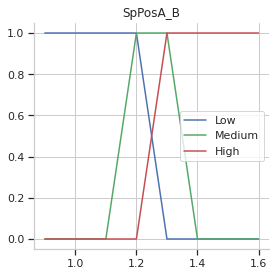

In [ ]:
memberships = [(SpPosA_B_lo, 'b', 'Low'), (SpPosA_B_md, 'g', 'Medium'), (SpPosA_B_hi, 'r', 'High')]
visualize_mf(SpPosA_B, memberships, 'SpPosA_B')

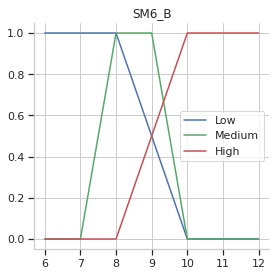

In [ ]:
memberships = [(SM6_B_lo, 'b', 'Low'), (SM6_B_md, 'g', 'Medium'), (SM6_B_hi, 'r', 'High')]
visualize_mf(SM6_B, memberships, 'SM6_B')

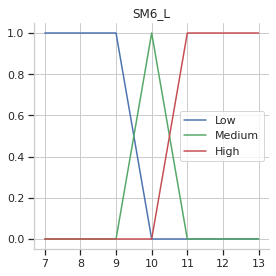

In [ ]:
memberships = [(SM6_L_lo, 'b', 'Low'), (SM6_L_md, 'g', 'Medium'), (SM6_L_hi, 'r', 'High')]
visualize_mf(SM6_L, memberships, 'SM6_L')

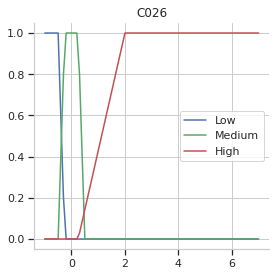

In [ ]:
memberships = [(C026_lo, 'b', 'Low'), (C026_md, 'g', 'Medium'), (C026_hi, 'r', 'High')]
visualize_mf(C026, memberships, 'C026')

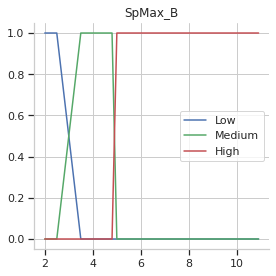

In [ ]:
memberships = [(SpMax_B_lo, 'b', 'Low'), (SpMax_B_md, 'g', 'Medium'), (SpMax_B_hi, 'r', 'High')]
visualize_mf(SpMax_B, memberships, 'SpMax_B')

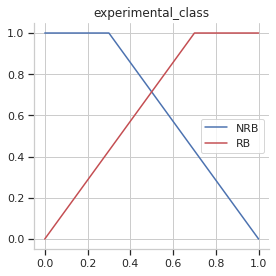

In [ ]:
memberships = [(experimental_class_nrb, 'b', 'NRB'), (experimental_class_rb, 'r', 'RB')]
visualize_mf(experimental_class, memberships, 'experimental_class')

Activation of fuzzy membership functions

In [ ]:
SpMax_L_level_lo = fuzz.interp_membership(SpMax_L, SpMax_L_lo, 4)
SpMax_L_level_md = fuzz.interp_membership(SpMax_L, SpMax_L_md, 4)
SpMax_L_level_hi = fuzz.interp_membership(SpMax_L, SpMax_L_hi, 4)

SpMax_A_level_lo = fuzz.interp_membership(SpMax_A, SpMax_A_lo, 2)
SpMax_A_level_md = fuzz.interp_membership(SpMax_A, SpMax_A_md, 2)
SpMax_A_level_hi = fuzz.interp_membership(SpMax_A, SpMax_A_hi, 2)

nHM_level_lo = fuzz.interp_membership(nHM, nHM_lo, 0.1)
nHM_level_md = fuzz.interp_membership(nHM, nHM_md, 0.1)
nHM_level_hi = fuzz.interp_membership(nHM, nHM_hi, 0.1)

SpPosA_B_level_lo = fuzz.interp_membership(SpPosA_B, SpPosA_B_lo, 1.2)
SpPosA_B_level_md = fuzz.interp_membership(SpPosA_B, SpPosA_B_md, 1.2)
SpPosA_B_level_hi = fuzz.interp_membership(SpPosA_B, SpPosA_B_hi, 1.2)

nCb_level_lo = fuzz.interp_membership(nCb, nCb_lo, 0.2)
nCb_level_md = fuzz.interp_membership(nCb, nCb_md, 0.2)
nCb_level_hi = fuzz.interp_membership(nCb, nCb_hi, 0.2)

HyWi_B_level_lo = fuzz.interp_membership(HyWi_B, HyWi_B_lo, 3.2)
HyWi_B_level_md = fuzz.interp_membership(HyWi_B, HyWi_B_md, 3.2)
HyWi_B_level_hi = fuzz.interp_membership(HyWi_B, HyWi_B_hi, 3.2)

SM6_B_level_lo = fuzz.interp_membership(SM6_B, SM6_B_lo, 4)
SM6_B_level_md = fuzz.interp_membership(SM6_B, SM6_B_md, 4)
SM6_B_level_hi = fuzz.interp_membership(SM6_B, SM6_B_hi, 4)

SM6_L_level_lo = fuzz.interp_membership(SM6_L, SM6_L_lo, 7)
SM6_L_level_md = fuzz.interp_membership(SM6_L, SM6_L_md, 7)
SM6_L_level_hi = fuzz.interp_membership(SM6_L, SM6_L_hi, 7)

C026_level_lo = fuzz.interp_membership(C026, C026_lo, 0)
C026_level_md = fuzz.interp_membership(C026, C026_md, 0)
C026_level_hi = fuzz.interp_membership(C026, C026_hi, 0)

SpMax_B_level_lo = fuzz.interp_membership(SpMax_B, SpMax_B_lo, 3.5)
SpMax_B_level_md = fuzz.interp_membership(SpMax_B, SpMax_B_md, 3.5)
SpMax_B_level_hi = fuzz.interp_membership(SpMax_B, SpMax_B_hi, 3.5)

Rules of fuzzy memberships

In [ ]:
rb_active_rule1 = np.fmin(SpMax_L_level_lo, nHM_level_md)
rb_active_rule2 = np.fmin(nCb_level_md, HyWi_B_level_lo)
rb_active_rule3 = np.fmin(SpMax_A_level_lo, SpPosA_B_level_lo)
rb_active_rule4 = np.fmin(SM6_B_level_lo, SM6_L_level_lo)
rb_active_rule5 = np.fmin(C026_level_md, SpMax_B_level_lo)
rb_active_rule6 = np.fmin(rb_active_rule2, rb_active_rule3)
rb_active_rule7 = np.fmin(rb_active_rule4, rb_active_rule5)
rb_active_rule8 = np.fmin(rb_active_rule6, rb_active_rule7)
rb_active_rule9 = np.fmin(rb_active_rule1, rb_active_rule8)
experimental_class_activation_rb = np.fmax(rb_active_rule9, experimental_class_rb)

nrb_active_rule1 = np.fmax(SpMax_L_level_hi, nHM_level_hi)
nrb_active_rule2 = np.fmax(nCb_level_hi, HyWi_B_level_hi)
nrb_active_rule3 = np.fmax(SpMax_A_level_hi, SpPosA_B_level_hi)
nrb_active_rule4 = np.fmax(SM6_B_level_hi, SM6_L_level_hi)
nrb_active_rule5 = np.fmax(C026_level_hi, SpMax_B_level_hi)
nrb_active_rule6 = np.fmax(nrb_active_rule2, nrb_active_rule3)
nrb_active_rule7 = np.fmax(nrb_active_rule4, nrb_active_rule5)
nrb_active_rule8 = np.fmax(nrb_active_rule6, nrb_active_rule7)
nrb_active_rule9 = np.fmax(nrb_active_rule1, nrb_active_rule8)
experimental_class_activation_nrb = np.fmin(nrb_active_rule9, experimental_class_nrb)

In [ ]:
experiment_class0 = np.zeros_like(experimental_class)

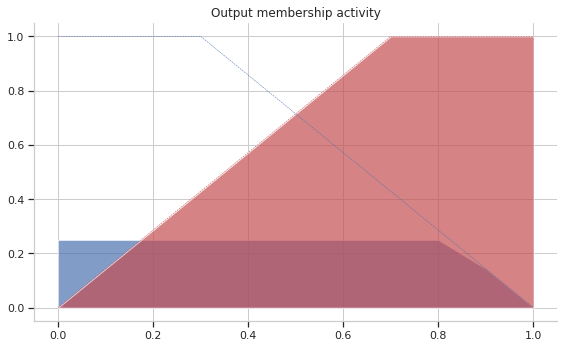

In [ ]:
fig, ax0 = plt.subplots(figsize=(8, 5))

ax0.fill_between(experimental_class, experiment_class0, experimental_class_activation_nrb, facecolor='b', alpha=0.7)
ax0.plot(experimental_class, experimental_class_nrb, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(experimental_class, experiment_class0, experimental_class_activation_rb, facecolor='r', alpha=0.7)
ax0.plot(experimental_class, experimental_class_rb, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

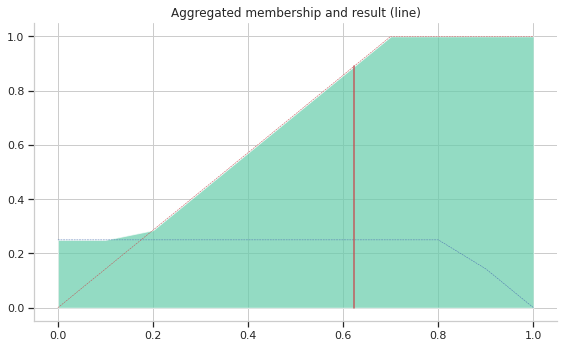

In [ ]:
aggregated = np.fmax(experimental_class_activation_nrb, experimental_class_activation_rb)

exp = fuzz.defuzz(experimental_class, aggregated, 'centroid')
exp_activation = fuzz.interp_membership(experimental_class, aggregated, exp) 

fig, ax0 = plt.subplots(figsize=(8, 5))

ax0.plot(experimental_class, experimental_class_activation_nrb, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(experimental_class, experimental_class_activation_rb, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(experimental_class, experiment_class0, aggregated, facecolor='mediumaquamarine', alpha=0.7)
ax0.plot([exp, exp], [0, exp_activation], 'r', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [ ]:
print('Results:')
if (exp > 0.5):
  print('RB:' + str(exp))
else:
  print('NRB:' + str(exp))

Results:
RB:0.6236074270557028


Adding different deffuzication method

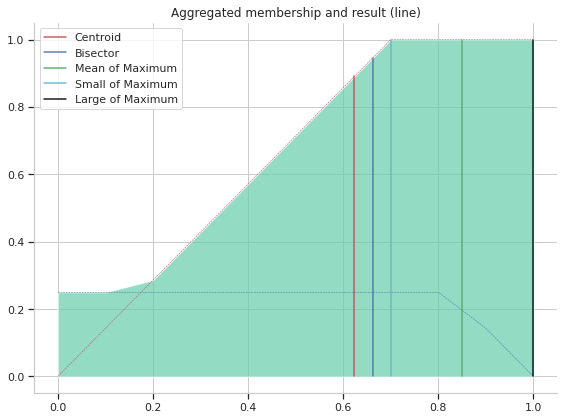

In [ ]:
aggregated = np.fmax(experimental_class_activation_nrb,experimental_class_activation_rb)

exp0 = fuzz.defuzz(experimental_class, aggregated, 'centroid')
centroid_activation = fuzz.interp_membership(experimental_class, aggregated, exp0) 

exp1 = fuzz.defuzz(experimental_class, aggregated, 'bisector')
bisector_activation = fuzz.interp_membership(experimental_class, aggregated, exp1) 

exp2 = fuzz.defuzz(experimental_class, aggregated, 'mom')
mom_activation = fuzz.interp_membership(experimental_class, aggregated, exp2) 

exp3 = fuzz.defuzz(experimental_class, aggregated, 'som')
som_activation = fuzz.interp_membership(experimental_class, aggregated, exp3) 

exp4 = fuzz.defuzz(experimental_class, aggregated, 'lom')
lom_activation = fuzz.interp_membership(experimental_class, aggregated, exp4) 

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(experimental_class, experimental_class_activation_nrb, 'b', linewidth=0.5, linestyle='--', )
ax.plot(experimental_class, experimental_class_activation_rb, 'r', linewidth=0.5, linestyle='--')
ax.fill_between(experimental_class, experiment_class0, aggregated, facecolor='mediumaquamarine', alpha=0.7)
ax.plot([exp0, exp0], (0, centroid_activation), 'r', linewidth=1.5, alpha=0.9, label='Centroid')
ax.plot([exp1, exp1], (0, bisector_activation), 'b', linewidth=1.5, alpha=0.9, label='Bisector')
ax.plot([exp2, exp2], (0, mom_activation), 'g', linewidth=1.5, alpha=0.9, label='Mean of Maximum')
ax.plot([exp3, exp3], (0, som_activation), 'c', linewidth=1.5, alpha=0.9, label='Small of Maximum')
ax.plot([exp4, exp4], (0, lom_activation), 'black', linewidth=1.5, alpha=0.9, label='Large of Maximum')
ax.set_title('Aggregated membership and result (line)')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
    
plt.tight_layout()

In [ ]:
methods = ['Centroid', 'Bisector', 'Mean of Maximum', 'Small of Maximum', 'Large of Maximum']
score = [exp0, exp1, exp2, exp3, exp4]
df2 = pd.DataFrame({'Method':methods, 'Scores': score})
df2

,Method,Scores
0,Centroid,0.623607
1,Bisector,0.662382
2,Mean of Maximum,0.850000
3,Small of Maximum,0.700000
4,Large of Maximum,1.000000


### Prediction

In [ ]:
scores_centroid = []
scores_bisector = []
scores_mom = []
scores_som = []
scores_lom = []

for i in range(0, df.shape[0]):
  SpMax_L_level_lo = fuzz.interp_membership(SpMax_L, SpMax_L_lo, df['SpMax_L'][i])
  SpMax_L_level_md = fuzz.interp_membership(SpMax_L, SpMax_L_md, df['SpMax_L'][i])
  SpMax_L_level_hi = fuzz.interp_membership(SpMax_L, SpMax_L_hi, df['SpMax_L'][i])

  SpMax_A_level_lo = fuzz.interp_membership(SpMax_A, SpMax_A_lo, df['SpMax_A'][i])
  SpMax_A_level_md = fuzz.interp_membership(SpMax_A, SpMax_A_md, df['SpMax_A'][i])
  SpMax_A_level_hi = fuzz.interp_membership(SpMax_A, SpMax_A_hi, df['SpMax_A'][i])

  nHM_level_lo = fuzz.interp_membership(nHM, nHM_lo, df['nHM'][i])
  nHM_level_md = fuzz.interp_membership(nHM, nHM_md, df['nHM'][i])
  nHM_level_hi = fuzz.interp_membership(nHM, nHM_hi, df['nHM'][i])

  SpPosA_B_level_lo = fuzz.interp_membership(SpPosA_B, SpPosA_B_lo, df['SpPosA_B(p)'][i])
  SpPosA_B_level_md = fuzz.interp_membership(SpPosA_B, SpPosA_B_md, df['SpPosA_B(p)'][i])
  SpPosA_B_level_hi = fuzz.interp_membership(SpPosA_B, SpPosA_B_hi, df['SpPosA_B(p)'][i])

  nCb_level_lo = fuzz.interp_membership(nCb, nCb_lo, df['nCb-'][i])
  nCb_level_md = fuzz.interp_membership(nCb, nCb_md, df['nCb-'][i])
  nCb_level_hi = fuzz.interp_membership(nCb, nCb_hi, df['nCb-'][i])

  HyWi_B_level_lo = fuzz.interp_membership(HyWi_B, HyWi_B_lo, df['HyWi_B(m)'][i])
  HyWi_B_level_md = fuzz.interp_membership(HyWi_B, HyWi_B_md, df['HyWi_B(m)'][i])
  HyWi_B_level_hi = fuzz.interp_membership(HyWi_B, HyWi_B_hi, df['HyWi_B(m)'][i])

  SM6_B_level_lo = fuzz.interp_membership(SM6_B, SM6_B_lo, df['SM6_B(m)'][i])
  SM6_B_level_md = fuzz.interp_membership(SM6_B, SM6_B_md, df['SM6_B(m)'][i])
  SM6_B_level_hi = fuzz.interp_membership(SM6_B, SM6_B_hi, df['SM6_B(m)'][i])

  SM6_L_level_lo = fuzz.interp_membership(SM6_L, SM6_L_lo, df['SM6_L'][i])
  SM6_L_level_md = fuzz.interp_membership(SM6_L, SM6_L_md, df['SM6_L'][i])
  SM6_L_level_hi = fuzz.interp_membership(SM6_L, SM6_L_hi, df['SM6_L'][i])

  C026_level_lo = fuzz.interp_membership(C026, C026_lo, df['C-026'][i])
  C026_level_md = fuzz.interp_membership(C026, C026_md, df['C-026'][i])
  C026_level_hi = fuzz.interp_membership(C026, C026_hi, df['C-026'][i])

  SpMax_B_level_lo = fuzz.interp_membership(SpMax_B, SpMax_B_lo, df['SpMax_B(m)'][i])
  SpMax_B_level_md = fuzz.interp_membership(SpMax_B, SpMax_B_md, df['SpMax_B(m)'][i])
  SpMax_B_level_hi = fuzz.interp_membership(SpMax_B, SpMax_B_hi, df['SpMax_B(m)'][i])

  rb_active_rule1 = np.fmin(SpMax_L_level_lo, nHM_level_md)
  rb_active_rule2 = np.fmin(nCb_level_md, HyWi_B_level_lo)
  rb_active_rule3 = np.fmin(SpMax_A_level_lo, SpPosA_B_level_lo)
  rb_active_rule4 = np.fmin(SM6_B_level_lo, SM6_L_level_lo)
  rb_active_rule5 = np.fmin(C026_level_md, SpMax_B_level_lo)
  rb_active_rule6 = np.fmin(rb_active_rule2, rb_active_rule3)
  rb_active_rule7 = np.fmin(rb_active_rule4, rb_active_rule5)
  rb_active_rule8 = np.fmin(rb_active_rule6, rb_active_rule7)
  rb_active_rule9 = np.fmin(rb_active_rule1, rb_active_rule8)
  experimental_class_activation_rb = np.fmax(rb_active_rule9, experimental_class_rb)

  nrb_active_rule1 = np.fmax(SpMax_L_level_hi, nHM_level_hi)
  nrb_active_rule2 = np.fmax(nCb_level_hi, HyWi_B_level_hi)
  nrb_active_rule3 = np.fmax(SpMax_A_level_hi, SpPosA_B_level_hi)
  nrb_active_rule4 = np.fmax(SM6_B_level_hi, SM6_L_level_hi)
  nrb_active_rule5 = np.fmax(C026_level_hi, SpMax_B_level_hi)
  nrb_active_rule6 = np.fmax(nrb_active_rule2, nrb_active_rule3)
  nrb_active_rule7 = np.fmax(nrb_active_rule4, nrb_active_rule5)
  nrb_active_rule8 = np.fmax(nrb_active_rule6, nrb_active_rule7)
  nrb_active_rule9 = np.fmax(nrb_active_rule1, nrb_active_rule8)
  experimental_class_activation_nrb = np.fmin(nrb_active_rule9, experimental_class_nrb)

  experiment_class0 = np.zeros_like(experimental_class)

  aggregated = np.fmax(experimental_class_activation_nrb, experimental_class_activation_rb)

  exp0 = fuzz.defuzz(experimental_class, aggregated, 'centroid')
  scores_centroid.append(exp0)

  exp1 = fuzz.defuzz(experimental_class, aggregated, 'bisector')
  scores_bisector.append(exp1)

  exp2 = fuzz.defuzz(experimental_class, aggregated, 'mom')
  scores_mom.append(exp2)

  exp3 = fuzz.defuzz(experimental_class, aggregated, 'som')
  scores_som.append(exp3)

  exp4 = fuzz.defuzz(experimental_class, aggregated, 'lom')
  scores_lom.append(exp4)

In [ ]:
name = []
accuracy = []
precision_rb = []
precision_nrb = []
recall_rb = []
recall_nrb = []
f1_rb = []
f1_nrb = []

1. Centroid

In [ ]:
classes = []

for score in scores_centroid:
  classes.append('RB' if score > 0.5 else 'NRB')

In [ ]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for i in range(0, df.shape[0]):
  if (df['experimental_class'][i] == 'RB'):
    if (classes[i] == 'RB'):
      true_positive = true_positive + 1
    else:
      false_negative = false_negative + 1

  else:
    if (classes[i] == 'NRB'):
      true_negative = true_negative + 1
    else:
      false_positive = false_positive + 1

In [ ]:
accuracy_centroid = (classes == df['experimental_class']).mean()
precision_centroid_RB = true_positive / (true_positive + false_positive)
precision_centroid_NRB = true_negative / (true_negative + false_negative)
recall_centroid_RB = true_positive / (true_positive + false_negative)
recall_centroid_NRB = true_negative / (true_negative + false_positive)
f1_centroid_RB = 2 * (precision_centroid_RB * recall_centroid_RB) / (precision_centroid_RB + recall_centroid_RB)
f1_centroid_NRB = 2 * (precision_centroid_NRB * precision_centroid_NRB) / (precision_centroid_NRB + precision_centroid_NRB)

print(f'Accuracy Score: {accuracy_centroid}')

print(f'RB:')
print(f'Precision Score: {precision_centroid_RB}')
print(f'Recall Score: {recall_centroid_RB}')
print(f'F1 Score: {f1_centroid_RB}')

print(f'NRB:')
print(f'Precision Score: {precision_centroid_NRB}')
print(f'Recall Score: {recall_centroid_NRB}')
print(f'F1 Score: {f1_centroid_NRB}')

name.append('Centroid')
accuracy.append(accuracy_centroid)
precision_rb.append(precision_centroid_RB)
precision_nrb.append(precision_centroid_NRB)
recall_rb.append(recall_centroid_RB)
recall_nrb.append(recall_centroid_NRB)
f1_rb.append(f1_centroid_RB)
f1_nrb.append(f1_centroid_NRB)

Accuracy Score: 0.6834123222748815
RB:
Precision Score: 0.518581081081081
Recall Score: 0.8623595505617978
F1 Score: 0.6476793248945147
NRB:
Precision Score: 0.8941684665226782
Recall Score: 0.592274678111588
F1 Score: 0.8941684665226782


2. Bisector

In [ ]:
classes = []

for score in scores_bisector:
  classes.append('RB' if score > 0.5 else 'NRB')

In [ ]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for i in range(0, df.shape[0]):
  if (df['experimental_class'][i] == 'RB'):
    if (classes[i] == 'RB'):
      true_positive = true_positive + 1
    else:
      false_negative = false_negative + 1

  else:
    if (classes[i] == 'NRB'):
      true_negative = true_negative + 1
    else:
      false_positive = false_positive + 1

In [ ]:
accuracy_bisector = (classes == df['experimental_class']).mean()
precision_bisector_RB = true_positive / (true_positive + false_positive)
precision_bisector_NRB = true_negative / (true_negative + false_negative)
recall_bisector_RB = true_positive / (true_positive + false_negative)
recall_bisector_NRB = true_negative / (true_negative + false_positive)
f1_bisector_RB = 2 * (precision_bisector_RB * recall_bisector_RB) / (precision_bisector_RB + recall_bisector_RB)
f1_bisector_NRB = 2 * (precision_bisector_NRB * precision_bisector_NRB) / (precision_bisector_NRB + precision_bisector_NRB)

print(f'Accuracy Score: {accuracy_bisector}')

print(f'RB:')
print(f'Precision Score: {precision_bisector_RB}')
print(f'Recall Score: {recall_bisector_RB}')
print(f'F1 Score: {f1_bisector_RB}')

print(f'NRB:')
print(f'Precision Score: {precision_bisector_NRB}')
print(f'Recall Score: {recall_bisector_NRB}')
print(f'F1 Score: {f1_bisector_NRB}')

name.append('Bisector')
accuracy.append(accuracy_bisector)
precision_rb.append(precision_bisector_RB)
precision_nrb.append(precision_bisector_NRB)
recall_rb.append(recall_bisector_RB)
recall_nrb.append(recall_bisector_NRB)
f1_rb.append(f1_bisector_RB)
f1_nrb.append(f1_bisector_NRB)

Accuracy Score: 0.6834123222748815
RB:
Precision Score: 0.518581081081081
Recall Score: 0.8623595505617978
F1 Score: 0.6476793248945147
NRB:
Precision Score: 0.8941684665226782
Recall Score: 0.592274678111588
F1 Score: 0.8941684665226782


3. Mean of Maximum

In [ ]:
classes = []

for score in scores_mom:
  classes.append('RB' if score > 0.5 else 'NRB')

In [ ]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for i in range(0, df.shape[0]):
  if (df['experimental_class'][i] == 'RB'):
    if (classes[i] == 'RB'):
      true_positive = true_positive + 1
    else:
      false_negative = false_negative + 1

  else:
    if (classes[i] == 'NRB'):
      true_negative = true_negative + 1
    else:
      false_positive = false_positive + 1

In [ ]:
accuracy_mom = (classes == df['experimental_class']).mean()
precision_mom_RB = true_positive / (true_positive + false_positive)
precision_mom_NRB = true_negative / (true_negative + false_negative)
recall_mom_RB = true_positive / (true_positive + false_negative)
recall_mom_NRB = true_negative / (true_negative + false_positive)
f1_mom_RB = 2 * (precision_mom_RB * recall_mom_RB) / (precision_mom_RB + recall_mom_RB)
f1_mom_NRB = 2 * (precision_mom_NRB * recall_mom_NRB) / (precision_mom_NRB + recall_mom_NRB)

print(f'Accuracy Score: {accuracy_mom}')

print(f'RB:')
print(f'Precision Score: {precision_mom_RB}')
print(f'Recall Score: {recall_mom_RB}')
print(f'F1 Score: {f1_mom_RB}')

print(f'NRB:')
print(f'Precision Score: {precision_mom_NRB}')
print(f'Recall Score: {recall_mom_NRB}')
print(f'F1 Score: {f1_mom_NRB}')

name.append('Mean Of Maximum')
accuracy.append(accuracy_mom)
precision_rb.append(precision_mom_RB)
precision_nrb.append(precision_mom_NRB)
recall_rb.append(recall_mom_RB)
recall_nrb.append(recall_mom_NRB)
f1_rb.append(f1_mom_RB)
f1_nrb.append(f1_mom_NRB)

Accuracy Score: 0.6815165876777252
RB:
Precision Score: 0.5168350168350169
Recall Score: 0.8623595505617978
F1 Score: 0.6463157894736843
NRB:
Precision Score: 0.8937093275488069
Recall Score: 0.5894134477825465
F1 Score: 0.7103448275862069


4. Small Of Maximum

In [ ]:
classes = []

for score in scores_som:
  classes.append('RB' if score > 0.5 else 'NRB')

In [ ]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for i in range(0, df.shape[0]):
  if (df['experimental_class'][i] == 'RB'):
    if (classes[i] == 'RB'):
      true_positive = true_positive + 1
    else:
      false_negative = false_negative + 1

  else:
    if (classes[i] == 'NRB'):
      true_negative = true_negative + 1
    else:
      false_positive = false_positive + 1

In [ ]:
accuracy_som = (classes == df['experimental_class']).mean()
precision_som_RB = true_positive / (true_positive + false_positive)
precision_som_NRB = true_negative / (true_negative + false_negative)
recall_som_RB = true_positive / (true_positive + false_negative)
recall_som_NRB = true_negative / (true_negative + false_positive)
f1_som_RB = 2 * (precision_som_RB * recall_som_RB) / (precision_som_RB + recall_som_RB)
f1_som_NRB = 2 * (precision_som_NRB * recall_som_NRB) / (precision_som_NRB + recall_som_NRB)

print(f'Accuracy Score: {accuracy_som}')

print(f'RB:')
print(f'Precision Score: {precision_som_RB}')
print(f'Recall Score: {recall_som_RB}')
print(f'F1 Score: {f1_som_RB}')

print(f'NRB:')
print(f'Precision Score: {precision_som_NRB}')
print(f'Recall Score: {recall_som_NRB}')
print(f'F1 Score: {f1_som_NRB}')

name.append('Small Of Maximum')
accuracy.append(accuracy_som)
precision_rb.append(precision_som_RB)
precision_nrb.append(precision_som_NRB)
recall_rb.append(recall_som_RB)
recall_nrb.append(recall_som_NRB)
f1_rb.append(f1_som_RB)
f1_nrb.append(f1_som_NRB)

Accuracy Score: 0.6815165876777252
RB:
Precision Score: 0.5168350168350169
Recall Score: 0.8623595505617978
F1 Score: 0.6463157894736843
NRB:
Precision Score: 0.8937093275488069
Recall Score: 0.5894134477825465
F1 Score: 0.7103448275862069


5. Large of Maximum

In [ ]:
classes = []

for score in scores_lom:
  classes.append('RB' if score > 0.5 else 'NRB')

In [ ]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for i in range(0, df.shape[0]):
  if (df['experimental_class'][i] == 'RB'):
    if (classes[i] == 'RB'):
      true_positive = true_positive + 1
    else:
      false_negative = false_negative + 1

  else:
    if (classes[i] == 'NRB'):
      true_negative = true_negative + 1
    else:
      false_positive = false_positive + 1

In [ ]:
accuracy_lom = (classes == df['experimental_class']).mean()
precision_lom_RB = true_positive / (true_positive + false_positive)
precision_lom_NRB = np.nan
recall_lom_RB = true_positive / (true_positive + false_negative)
recall_lom_NRB = true_negative / (true_negative + false_positive)
f1_lom_RB = 2 * (precision_lom_RB * recall_lom_RB) / (precision_lom_RB + recall_lom_RB)
f1_lom_NRB = 2 * (precision_lom_NRB * recall_lom_NRB) / (precision_lom_NRB + recall_lom_NRB)

print(f'Accuracy Score: {accuracy_lom}')

print(f'RB:')
print(f'Precision Score: {precision_lom_RB}')
print(f'Recall Score: {recall_lom_RB}')
print(f'F1 Score: {f1_lom_RB}')

print(f'NRB:')
print(f'Precision Score: {precision_lom_NRB}')
print(f'Recall Score: {recall_lom_NRB}')
print(f'F1 Score: {f1_lom_NRB}')

name.append('Large Of Maximum')
accuracy.append(accuracy_lom)
precision_rb.append(precision_lom_RB)
precision_nrb.append(precision_lom_NRB)
recall_rb.append(recall_lom_RB)
recall_nrb.append(recall_lom_NRB)
f1_rb.append(f1_lom_RB)
f1_nrb.append(f1_lom_NRB)

Accuracy Score: 0.33744075829383885
RB:
Precision Score: 0.33744075829383885
Recall Score: 1.0
F1 Score: 0.5046066619418852
NRB:
Precision Score: nan
Recall Score: 0.0
F1 Score: nan


In [ ]:
def ScoreDataframe(names, accuracy, precision_rb, precision_nrb, recall_rb, recall_nrb, f1_rb, f1_nrb):
  scoreDataFrame = pd.DataFrame({'Defuzzification': names, 'Accuracy': accuracy, 'Precision RB': precision_rb, 'Precision NRB': precision_nrb, 'Recall RB': recall_rb, 'Recall NRB': recall_nrb, 'F1 RB': f1_rb, 'F1 NRB': f1_nrb})
  return scoreDataFrame

In [ ]:
dataframe = ScoreDataframe(name, accuracy, precision_rb, precision_nrb, recall_rb, recall_nrb, f1_rb, f1_nrb)
dataframe

,Defuzzification,Accuracy,Precision RB,Precision NRB,Recall RB,Recall NRB,F1 RB,F1 NRB
0,Centroid,0.683412,0.518581,0.894168,0.86236,0.592275,0.647679,0.894168
1,Bisector,0.683412,0.518581,0.894168,0.86236,0.592275,0.647679,0.894168
2,Mean Of Maximum,0.681517,0.516835,0.893709,0.86236,0.589413,0.646316,0.710345
3,Small Of Maximum,0.681517,0.516835,0.893709,0.86236,0.589413,0.646316,0.710345
4,Large Of Maximum,0.337441,0.337441,NaN,1.00000,0.000000,0.504607,NaN


### Optimization using Evolutionary Algorithm

In [ ]:
!pip install deap

     |████████████████████████████████| 163kB 5.3MB/s 


In [ ]:
from deap import base
from deap import creator
from deap import tools
import random as rnd
import math

In [ ]:
rb_rules = []
nrb_rules = []

for i in range(0, df.shape[0]):
  elements, rb_elements, nrb_elements = [], [], []

  SpMax_L_level_lo = fuzz.interp_membership(SpMax_L, SpMax_L_lo, df['SpMax_L'][i])
  SpMax_L_level_md = fuzz.interp_membership(SpMax_L, SpMax_L_md, df['SpMax_L'][i])
  SpMax_L_level_hi = fuzz.interp_membership(SpMax_L, SpMax_L_hi, df['SpMax_L'][i])
  elements.append((SpMax_L_level_lo, 1))
  elements.append((SpMax_L_level_md, 1))
  elements.append((SpMax_L_level_hi, 1))

  SpMax_A_level_lo = fuzz.interp_membership(SpMax_A, SpMax_A_lo, df['SpMax_A'][i])
  SpMax_A_level_md = fuzz.interp_membership(SpMax_A, SpMax_A_md, df['SpMax_A'][i])
  SpMax_A_level_hi = fuzz.interp_membership(SpMax_A, SpMax_A_hi, df['SpMax_A'][i])
  elements.append((SpMax_A_level_lo, 2))
  elements.append((SpMax_A_level_md, 2))
  elements.append((SpMax_A_level_hi, 2))

  nHM_level_lo = fuzz.interp_membership(nHM, nHM_lo, df['nHM'][i])
  nHM_level_md = fuzz.interp_membership(nHM, nHM_md, df['nHM'][i])
  nHM_level_hi = fuzz.interp_membership(nHM, nHM_hi, df['nHM'][i])
  elements.append((nHM_level_lo, 3))
  elements.append((nHM_level_md, 3))
  elements.append((nHM_level_hi, 3))

  SpPosA_B_level_lo = fuzz.interp_membership(SpPosA_B, SpPosA_B_lo, df['SpPosA_B(p)'][i])
  SpPosA_B_level_md = fuzz.interp_membership(SpPosA_B, SpPosA_B_md, df['SpPosA_B(p)'][i])
  SpPosA_B_level_hi = fuzz.interp_membership(SpPosA_B, SpPosA_B_hi, df['SpPosA_B(p)'][i])
  elements.append((SpPosA_B_level_lo, 4))
  elements.append((SpPosA_B_level_md, 4))
  elements.append((SpPosA_B_level_hi, 4))

  nCb_level_lo = fuzz.interp_membership(nCb, nCb_lo, df['nCb-'][i])
  nCb_level_md = fuzz.interp_membership(nCb, nCb_md, df['nCb-'][i])
  nCb_level_hi = fuzz.interp_membership(nCb, nCb_hi, df['nCb-'][i])
  elements.append((nCb_level_lo, 5))
  elements.append((nCb_level_md, 5))
  elements.append((nCb_level_hi, 5))

  HyWi_B_level_lo = fuzz.interp_membership(HyWi_B, HyWi_B_lo, df['HyWi_B(m)'][i])
  HyWi_B_level_md = fuzz.interp_membership(HyWi_B, HyWi_B_md, df['HyWi_B(m)'][i])
  HyWi_B_level_hi = fuzz.interp_membership(HyWi_B, HyWi_B_hi, df['HyWi_B(m)'][i])
  elements.append((HyWi_B_level_lo, 6))
  elements.append((HyWi_B_level_md, 6))
  elements.append((HyWi_B_level_hi, 6))

  SM6_B_level_lo = fuzz.interp_membership(SM6_B, SM6_B_lo, df['SM6_B(m)'][i])
  SM6_B_level_md = fuzz.interp_membership(SM6_B, SM6_B_md, df['SM6_B(m)'][i])
  SM6_B_level_hi = fuzz.interp_membership(SM6_B, SM6_B_hi, df['SM6_B(m)'][i])
  elements.append((SM6_B_level_lo, 7))
  elements.append((SM6_B_level_md, 7))
  elements.append((SM6_B_level_hi, 7))

  SM6_L_level_lo = fuzz.interp_membership(SM6_L, SM6_L_lo, df['SM6_L'][i])
  SM6_L_level_md = fuzz.interp_membership(SM6_L, SM6_L_md, df['SM6_L'][i])
  SM6_L_level_hi = fuzz.interp_membership(SM6_L, SM6_L_hi, df['SM6_L'][i])
  elements.append((SM6_L_level_lo, 8))
  elements.append((SM6_L_level_md, 8))
  elements.append((SM6_L_level_hi, 8))

  C026_level_lo = fuzz.interp_membership(C026, C026_lo, df['C-026'][i])
  C026_level_md = fuzz.interp_membership(C026, C026_md, df['C-026'][i])
  C026_level_hi = fuzz.interp_membership(C026, C026_hi, df['C-026'][i])
  elements.append((C026_level_lo, 9))
  elements.append((C026_level_md, 9))
  elements.append((C026_level_hi, 9))

  SpMax_B_level_lo = fuzz.interp_membership(SpMax_B, SpMax_B_lo, df['SpMax_B(m)'][i])
  SpMax_B_level_md = fuzz.interp_membership(SpMax_B, SpMax_B_md, df['SpMax_B(m)'][i])
  SpMax_B_level_hi = fuzz.interp_membership(SpMax_B, SpMax_B_hi, df['SpMax_B(m)'][i])
  elements.append((SpMax_B_level_lo, 10))
  elements.append((SpMax_B_level_md, 10))
  elements.append((SpMax_B_level_hi, 10))

  for first_element, first_index in elements:
    for second_element, second_index in elements:

      if first_index == second_index:
        continue
      
      prob = random.randint(0, 1)

      if prob > 0.5:
        active_rule = np.fmin(first_element, second_element)
        rb_elements.append(active_rule)
      else:
        active_rule = np.fmax(first_element, second_element)
        nrb_elements.append(active_rule)

  rb_rules.append(rb_elements)
  nrb_rules.append(nrb_elements)

In [ ]:
new_rb_rules, new_nrb_rules = [], []

for rule in rb_rules:
  new_rb_rules.append(rule[:350])

for rule in nrb_rules:
  new_nrb_rules.append(rule[:350])

rb_rules = pd.DataFrame(new_rb_rules)
nrb_rules = pd.DataFrame(new_nrb_rules)

In [ ]:
def getDefuzzification():
  defuzzifications = ['centroid', 'bisector', 'mom', 'som', 'lom']
  index = rnd.randint(0, len(defuzzifications) - 1)   
  defuzzification = defuzzifications[index]

  return defuzzification

def getRules(individual, rules_type, start_index, end_index):
  selected_rules = list(rules_type)

  for i in range(len(individual[start_index : end_index])):
    if individual[start_index + i] < 1:
      selected_rules.remove(rules_type[i])

  return_rule = selected_rules[0]
  
  while len(selected_rules) > 1:
    first_index = random.randint(0, len(selected_rules) - 1)
    first_rule = selected_rules[first_index]
    second_index = random.randint(0, len(selected_rules) - 1)
    second_rule = selected_rules[second_index]

    if first_index == second_index:
      continue

    selected_rules.remove(first_rule)
    selected_rules.remove(second_rule)

    if start_index == 1: 
      active_rule = np.fmin(first_rule, second_rule)
      return_rule = np.fmin(return_rule, active_rule)
    else:
      active_rule = np.fmax(first_rule, second_rule)
      return_rule = np.fmax(return_rule, active_rule)

  return return_rule

def evaluteOneMax(individual):
  scores, classes = [], []
  defuzzification = individual[0]
  rb_active_rule = getRules(individual, rb_rules.columns, 1, len(rb_rules.columns))
  nrb_active_rule = getRules(individual, nrb_rules.columns, len(rb_rules.columns) + 1, len(nrb_rules.columns))

  experimental_class_activation_rb = np.fmax(rb_active_rule, experimental_class_rb)
  experimental_class_activation_nrb = np.fmin(nrb_active_rule, experimental_class_nrb)

  aggregated = np.fmax(experimental_class_activation_nrb, experimental_class_activation_rb)
  exp = fuzz.defuzz(experimental_class, aggregated, defuzzification)
  scores.append(exp)

  for score in scores_centroid:
    classes.append('RB' if score > 0.5 else 'NRB')

  true_positive = 0
  false_positive = 0
  true_negative = 0
  false_negative = 0

  for i in range(0, df.shape[0]):
    if (df['experimental_class'][i] == 'RB'):
      if (classes[i] == 'RB'):
        true_positive = true_positive + 1
      else:
        false_negative = false_negative + 1

    else:
      if (classes[i] == 'NRB'):
        true_negative = true_negative + 1
      else:
        false_positive = false_positive + 1

  accuracy = (classes == df['experimental_class']).mean()

  return [accuracy]

def myMutate(individual, indpb=0.05):
  if rnd.random() < indpb:
    individual[0] = toolbox.attribute_Defuzzification()

  for i in range(len(individual[1:])):
    if rnd.random() < indpb:
        individual[1 + i] = toolbox.attribute_bool()

In [ ]:
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('attribute_bool', rnd.randint, 0, 1)
toolbox.register('attribute_Defuzzification', getDefuzzification)

function_sequence = [toolbox.attribute_Defuzzification]

for i in range(300):
  function_sequence.append(toolbox.attribute_bool)

for i in range(300):
  function_sequence.append(toolbox.attribute_bool)

toolbox.register('individual', tools.initCycle, creator.Individual, function_sequence, 1)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [ ]:
CXPB, MUTPB, NGEN, POPSIZE = 0.5, 0.2, 100, 100
pop = toolbox.population(n=POPSIZE) 

In [ ]:
toolbox.register('evaluate', evaluteOneMax)
toolbox.register('mate', tools.cxTwoPoint)
toolbox.register('mutate', myMutate, indpb=0.15)
toolbox.register('select', tools.selTournament, tournsize=3)
rnd.seed(66)

In [ ]:
print('Start evolution of Fuzzy Logic')

fitnesses = list(map(toolbox.evaluate, pop))
for individual, fitness in zip(pop, fitnesses):
  individual.fitness.values = fitness

print (f'  Evaluated {len(pop)} individuals')

for generation in range(NGEN):
  print(f'-- Generation {generation} --')

  offspring = toolbox.select(pop, len(pop))
  offspring = list(map(toolbox.clone, offspring))

  for child1, child2 in zip(offspring[::2], offspring[1::2]):
    if rnd.random() < CXPB:
      c1 = toolbox.clone(child1)
      c2 = toolbox.clone(child2)
      toolbox.mate(child1, child2)
      if c1 != child1: 
        del child1.fitness.values
      if c2 != child2: 
        del child2.fitness.values

  for mutant in offspring:
    if rnd.random() < MUTPB:
      m1 = toolbox.clone(mutant)
      toolbox.mutate(mutant)
      if m1 != mutant: 
        del mutant.fitness.values

  invalid_individual = [individual for individual in offspring if not individual.fitness.valid]
  fitnesses = map(toolbox.evaluate, invalid_individual)

  for individual, fitness in zip(invalid_individual, fitnesses):
    individual.fitness.values = fitness

  print (f'  Evaluated {len(invalid_individual)} individuals')

  pop[:] = offspring
  fits = [individual.fitness.values[0] for individual in pop]

  length = len(pop)
  mean = sum(fits) / length
  sum2 = sum(x * x for x in fits)
  std = abs(sum2 / length - mean**2)**0.5
  best_individual = tools.selBest(pop, POPSIZE)[0]
  print(f'Best individual is {best_individual}, {best_individual.fitness.values}')        
  print(f'  Min: {min(fits)}')
  print(f'  Max: {max(fits)}')

print('End evolution of Fuzzy Logic')

best_individual = tools.selBest(pop, POPSIZE)[0]
print(f'Best individual is {best_individual}, {best_individual.fitness.values}')

Start evolution of Fuzzy Logic
  Evaluated 100 individuals
-- Generation 0 --
  Evaluated 70 individuals
Best individual is ['lom', 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0

In [ ]:
scores, classes = [], []
defuzzification = best_individual[0]
rb_active_rule = getRules(best_individual, rb_rules.columns, 1, len(rb_rules.columns))
nrb_active_rule = getRules(best_individual, nrb_rules.columns, len(rb_rules.columns) + 1, len(nrb_rules.columns))

experimental_class_activation_rb = np.fmax(rb_active_rule, experimental_class_rb)
experimental_class_activation_nrb = np.fmin(nrb_active_rule, experimental_class_nrb)

aggregated = np.fmax(experimental_class_activation_nrb, experimental_class_activation_rb)
exp = fuzz.defuzz(experimental_class, aggregated, defuzzification)
scores.append(exp)

for score in scores_centroid:
  classes.append('RB' if score > 0.5 else 'NRB')

true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0

for i in range(0, df.shape[0]):
  if (df['experimental_class'][i] == 'RB'):
    if (classes[i] == 'RB'):
      true_positive = true_positive + 1
    else:
      false_negative = false_negative + 1

  else:
    if (classes[i] == 'NRB'):
      true_negative = true_negative + 1
    else:
      false_positive = false_positive + 1

accuracy = (classes == df['experimental_class']).mean()
precision_RB = true_positive / (true_positive + false_positive)
precision_NRB = true_negative / (true_negative + false_negative)
recall_RB = true_positive / (true_positive + false_negative)
recall_NRB = true_negative / (true_negative + false_positive)
f1_RB = 2 * (precision_RB * recall_RB) / (precision_RB + recall_RB)
f1_NRB = 2 * (precision_NRB * recall_NRB) / (precision_NRB + recall_NRB)

print(f'Accuracy Score: {accuracy}')

print(f'RB:')
print(f'Precision Score: {precision_RB}')
print(f'Recall Score: {recall_RB}')
print(f'F1 Score: {f1_RB}')

print(f'NRB:')
print(f'Precision Score: {precision_NRB}')
print(f'Recall Score: {recall_NRB}')
print(f'F1 Score: {f1_NRB}')

Accuracy Score: 0.6834123222748815
RB:
Precision Score: 0.518581081081081
Recall Score: 0.8623595505617978
F1 Score: 0.6476793248945147
NRB:
Precision Score: 0.8941684665226782
Recall Score: 0.592274678111588
F1 Score: 0.7125645438898451
